# Evaluation

## • Ongoing Assessment (50%)

- Test 1 ≈ ⅓ (at least 3.00)
- Test 2 ≈ ⅓ (at least 3.00)
- Homeworks ≈ ⅓ (at least 3.00 from at least 5 tasks)

## • Exam (50%)

- Project Presentation ≈ ⅔ (optional)
- Interview (final assessment) ≈ ⅓
- The evaluation is more like a point system - for excellent you do not need to
collect the maximum number of points._



# Exercises' Topics

10 𝑇𝑜𝑝𝑖𝑐𝑠= 𝑓𝑟𝑜𝑚Homeworks 8 𝑡𝑜 10

- Problem Solving and Search
    - Uninformed _(Blind)_ Search
    - Informed _(Heuristic)_ Search
    - Constraint Satisfaction Problems
    - Genetic Algorithms
    - Games
- Machine Learning
    - _k_ - Nearest Neighbors
    - Naïve Bayes Classifier
    - Decision Tree
    - _k_ Means
    - Neural Networks

# Exercises by Week

1. Introduction, Recap and Uninformed (Blind) Search
2. Informed (Heuristic) Search
3. Constraint Satisfaction Problems
4. Genetic Algorithms
5. Games
6. Introduction to Machine Learning
7. k-Nearest Neighbors
8. Naïve Bayes Classifier
9.  Decision Tree
10. kMeans
11. Neural Networks


# Resources

## The Main Book

- Stuart Russell and Peter Norvig. Artificial Intelligence: A Modern Approach. Prentice Hall.[http://aima.eecs.berkeley.edu/](http://aima.eecs.berkeley.edu/)

 Lectures, Exercises and all other resources at Moodle

# Problem Solving and Search

## Basic Concepts

- State Space
- Representation of the State Space
- Search Strategies Evaluation
- Global Search vs Local Search
- Uninformed Search vs Informed Search
- Graph and Tree Traversal


# State Space

- **State** : a representation (formulation) of the task in the process of its solution.

- **Initial State** (presented with **_S_** )
- **Intermediate State** (presented with any capital letter except **_S_** and **_G_** )
- **Goal State** (presented with **_G_** , if there are more: **_G 1_** , **_G 2_** , etc.)
- **Successor Function** **_(Operator)_** : obtaining one state from another

- **Path Cost** : additive; e.g., sum of distances, number of actions executed, etc.

- **State Space** : the totality of all possible states that can be obtained from a given initial state.

- **A _solution_** : _is a sequence of actions leading from the initial state to a goal state_



# Representation of the State Space

- Graph or Tree where each state is represented with Node and the successor function (operator) is represented with Edge.

- When the state space can be represented as a tree , it is called Search Tree. The _initial state_ is the _root_ of the tree.The terminal states and the _goal state_ are represented with leaves.


# Search Strategies Evaluation Strategies are evaluated along the following dimensions:

- **Completeness** : does it always find a solution if one exists?
- **Time Complexity** : number of nodes generated/expanded
- **Space Complexity** : maximum number of nodes in memory
- **Optimality** : does it always find a least-cost solution?

# We look at the **_worst-case_** _complexity (Big O notation)._ Time and space complexity are measured in terms of:

- **_b_** – maximum branching factor of the search tree
- **_d_** – depth of the least-cost solution
- **_m_** – maximum depth of the state space (may be ∞)

# Global Search vs Local Search

- Global Search : They look all over the state space. If necessary, all states will be traversed.

- Local Search : They only look at the local area, so they can only look at states in this area. If the solution is outside of it, they will not be able to find it.

_* Generally Local Search is not used for finding a path from state
A to state B._


## Uninformed (Blind) Search vs Informed (Heuristic) Search - **Uninformed Search** : Uninformed strategies use only the information available in the problem definition.

- _Examples: DFS, BFS, UCS, DLS, IDS._

## Informed Search: Informed strategies have information on the goal state which helps in more efficient searching. This information is obtained by a function (heuristic) that estimates how close a state is to the goal state.

### Examples: Greedy Best-First Search, A*, Beam Search, Hill Climbing.



# Local Search

- **Local Search** in _Artificial Intelligence_ is an optimizing
    algorithm to find the optimal solution more quickly.
- **Local search algorithms** are used when we care only about
    a solution but not the path to a solution.
- **Local search** is a heuristic method for solving
    computationally hard optimization problems.
- **Local search** can be used on problems that can be
    formulated as finding a solution maximizing a criterion
    among a number of candidate solutions.
- **Local search algorithms** move from solution to solution in
    the space of candidate solutions (the search space) by
    applying local changes, until a solution deemed optimal is
    found or a time bound is elapsed.




## Uninformed (Blind) Search vs Informed (Heuristic) Search

### Uninformed Search: Uninformed strategies use  only the information available in the problem definition.

- _Examples: DFS, BFS, UCS, DLS, IDS._
### Informed Search: Informed strategies have information on the goal state which helps in more efficient searching. This information is obtained by a function (heuristic) that estimates how close a state is to the goal state.

- _Examples: Greedy Best-First Search, A*, Beam Search,_


In [3]:
from dataclasses import dataclass
from typing import Any
from collections import defaultdict

import heapq
from IPython.display import clear_output

@dataclass
class Node:
    value: Any = 'no'
    heuristic: float = 0
    color: str = 'white'


@dataclass
class Graph:
    nodes: Any
    edges: Any

def make_graph(nodes, edges):
    nodes = {v: Node(value=v, heuristic=h) for v, h in nodes}
    
    undirected_edges = defaultdict(list)
    for node, children in edges.items():
        for child, weight in children:
            undirected_edges[node].append((child, weight))
            undirected_edges[child].append((node, weight))
    
    return Graph(nodes=nodes, edges=undirected_edges)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import time


def draw_spring_graph(graph, seed=1, figsize=(8, 8)):
    nodes = graph.nodes.values()
    edges = []
    for node, children in graph.edges.items():
        for c, weight in children:
            edges.append((node, c, weight))
        
    G = nx.Graph()
    for n in nodes:
        G.add_node(n.value)

    for f, t, _ in edges:
        G.add_edge(f, t)

    pos = nx.spring_layout(G, seed=seed)

    plt.figure(figsize=figsize)

    nx.draw_networkx_edges(G, pos, alpha=1, width=3)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n.value for n in nodes],
        node_size=1500,
        node_color=[n.color for n in nodes],
        edgecolors = 'black',
        linewidths = 1
    )
    nx.draw_networkx_labels(
        G,
        pos,
        labels={n.value: f'{n.value}({n.heuristic})' for n in nodes},
        font_size=12,
        font_color='black',
        font_weight='bold'
    )

    edge_labels = dict([((n1, n2), f'{w}') for n1, n2, w in edges])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
    label_pos=0.5,
    font_size=15)

    # Set margins for the axes so that nodes aren't clipped

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()


def display_graph(g, current):
    old_color_curr = g.nodes[current].color
    g.nodes[current].color = 'red'
    draw_spring_graph(g, seed=100, figsize=(16, 10))
    g.nodes[current].color = old_color_curr

In [5]:
g = make_graph(
    nodes=[('A', 0), ('B', 0), ('C', 0), ('D', 0), ('S', 0), ('G', 0)],
    edges={
        'S': [('C', 14), ('B', 9), ('A', 7)],
        'A': [('B', 10), ('D', 15)],
        'B': [('C', 2), ('D', 11)],
        'C': [('G', 9)],
        'D': [('G', 6)],
    }
)

In [6]:
# g.nodes['S'].color = 'red'
# g.nodes['G'].color = 'green'

In [7]:
def resetColor(g):
    for _, node in g.nodes.items():
        node.color = 'white'

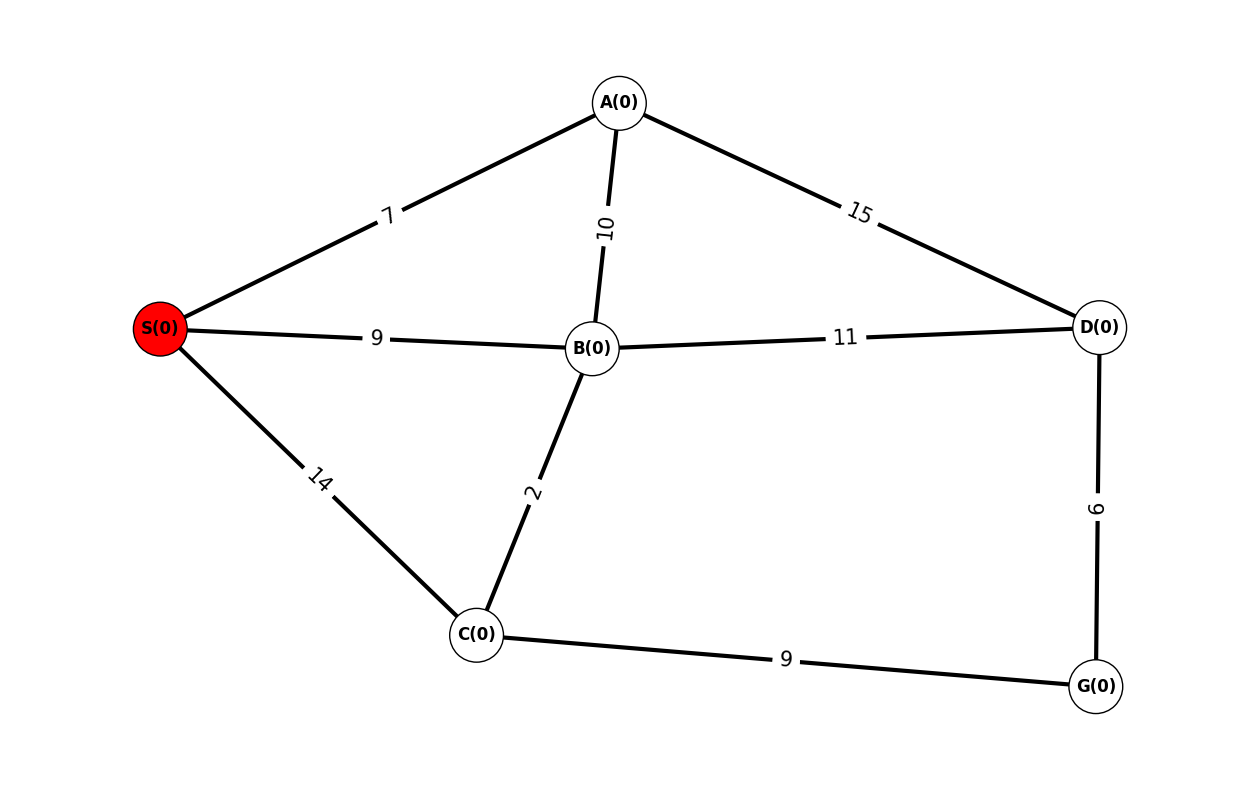

In [8]:
display_graph(g, 'S')

## Legend
- front gray
- visited blue
- current red
- goal green

## DFS

In [9]:
def dfsRec(g, curr, end):
    if curr == end:
        return
    
    g.nodes[curr].color = 'gray'
    print(curr)
    display_graph(g, curr)
    
    for node, _ in reversed(g.edges[curr]):
        if g.nodes[node].color == 'white':
            dfsRec(g, node, end) 

    g.nodes[curr].color = 'blue'


S


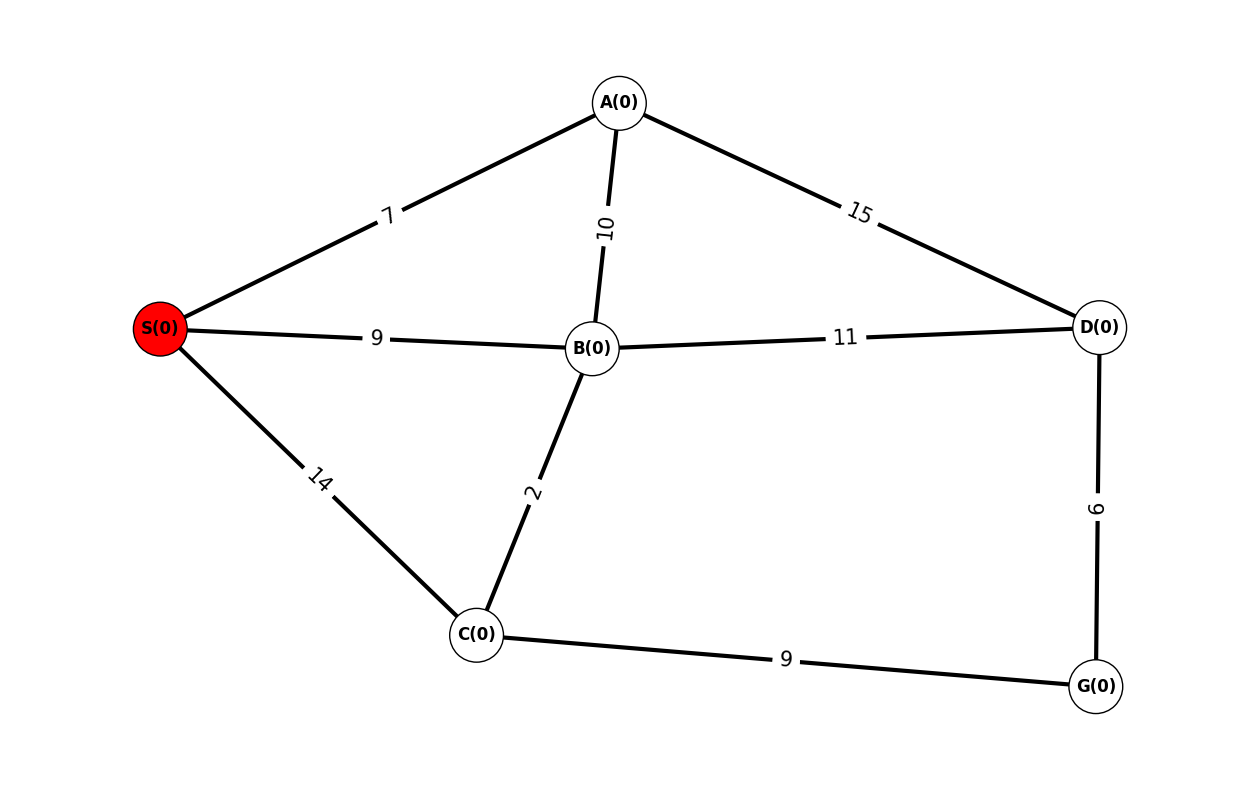

A


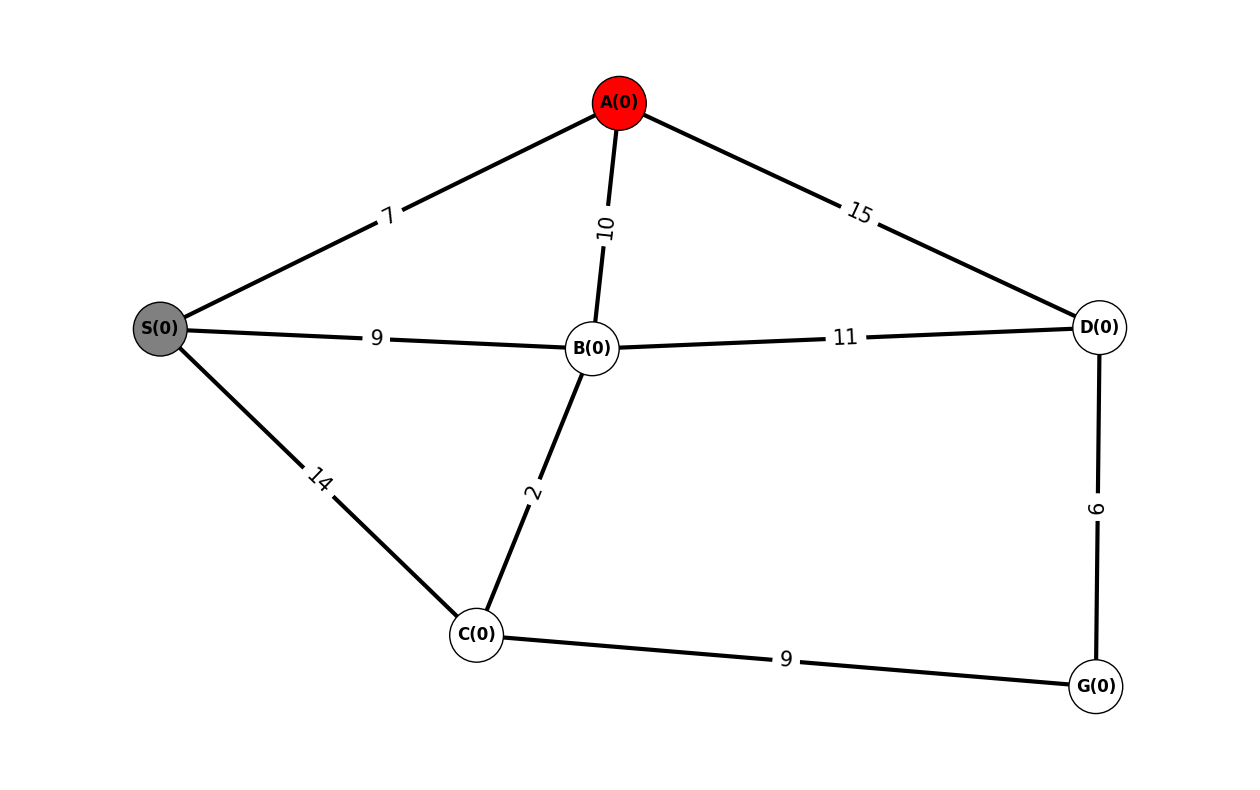

D


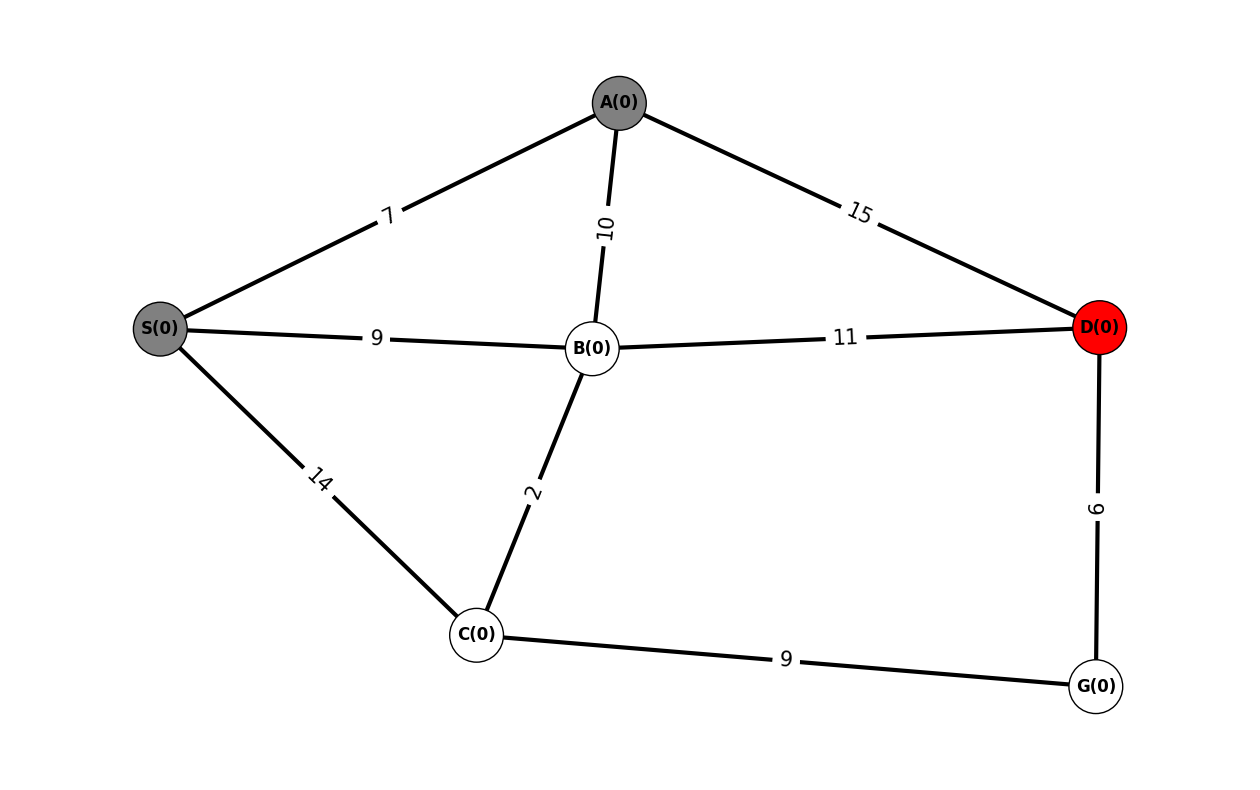

B


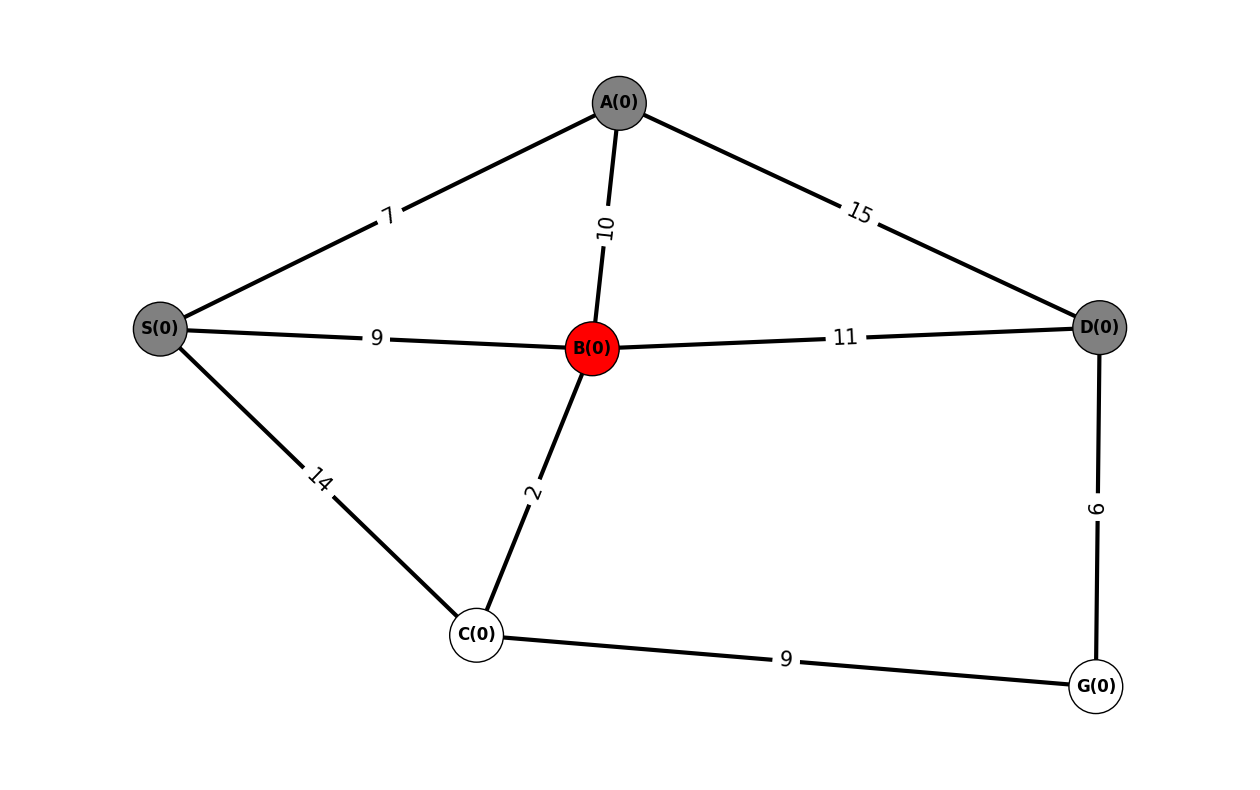

C


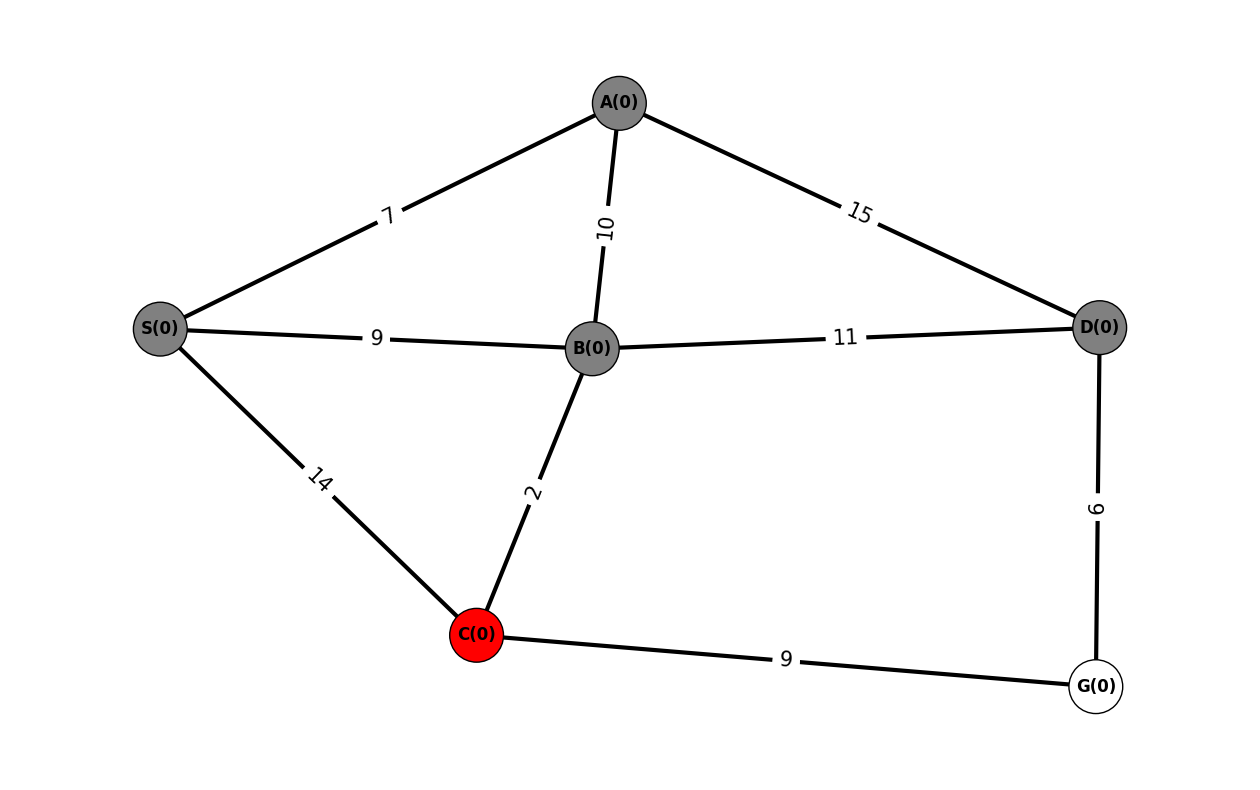

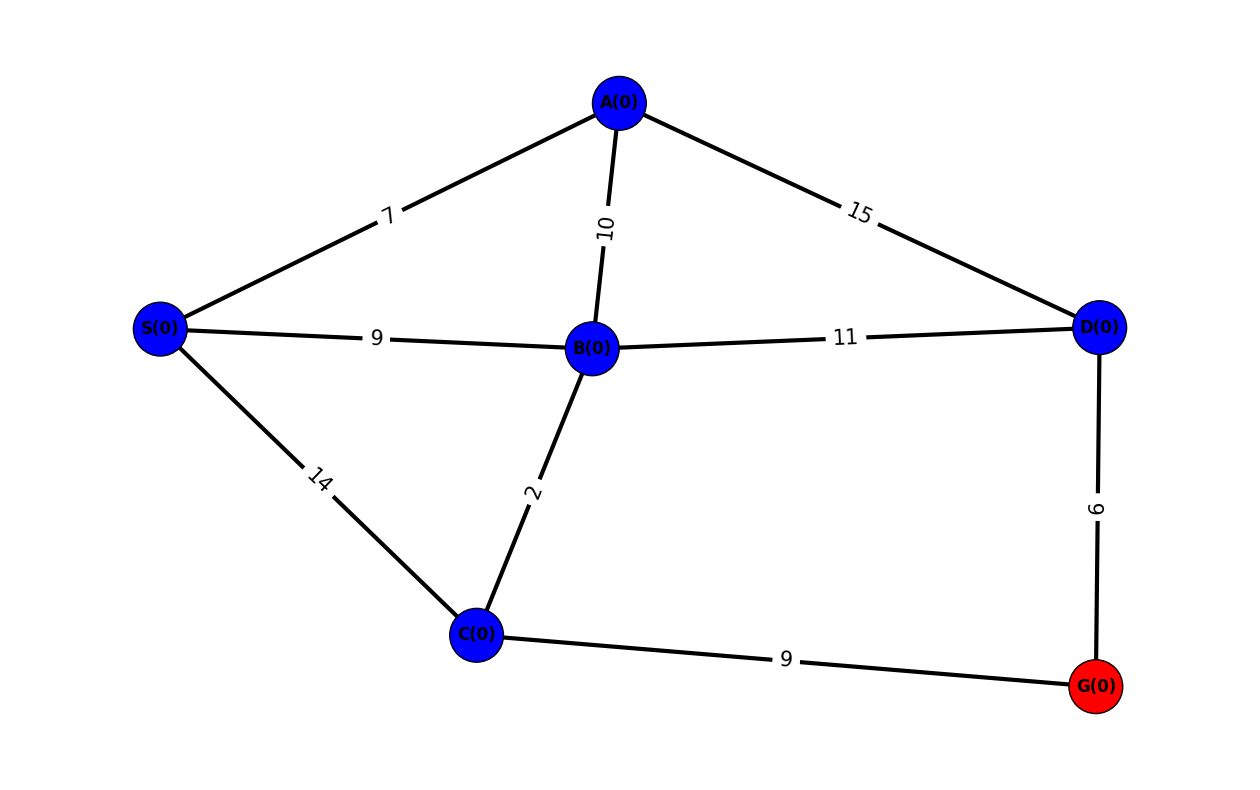

In [10]:
resetColor(g)
dfsRec(g, 'S', 'G')
display_graph(g, 'G')

In [11]:
def dfs(g, start, end):
    stack = [start]

    while len(stack) > 0:
        current = stack.pop()
        g.nodes[current].color = 'blue'

        if current == end:
            break

        for node, _ in g.edges[current]:
            if g.nodes[node].color == 'white':
                stack.append(node)
                g.nodes[node].color = 'gray'

        print(current, stack)
        display_graph(g, current)

    print(current)
    display_graph(g, current)


S ['C', 'B', 'A']


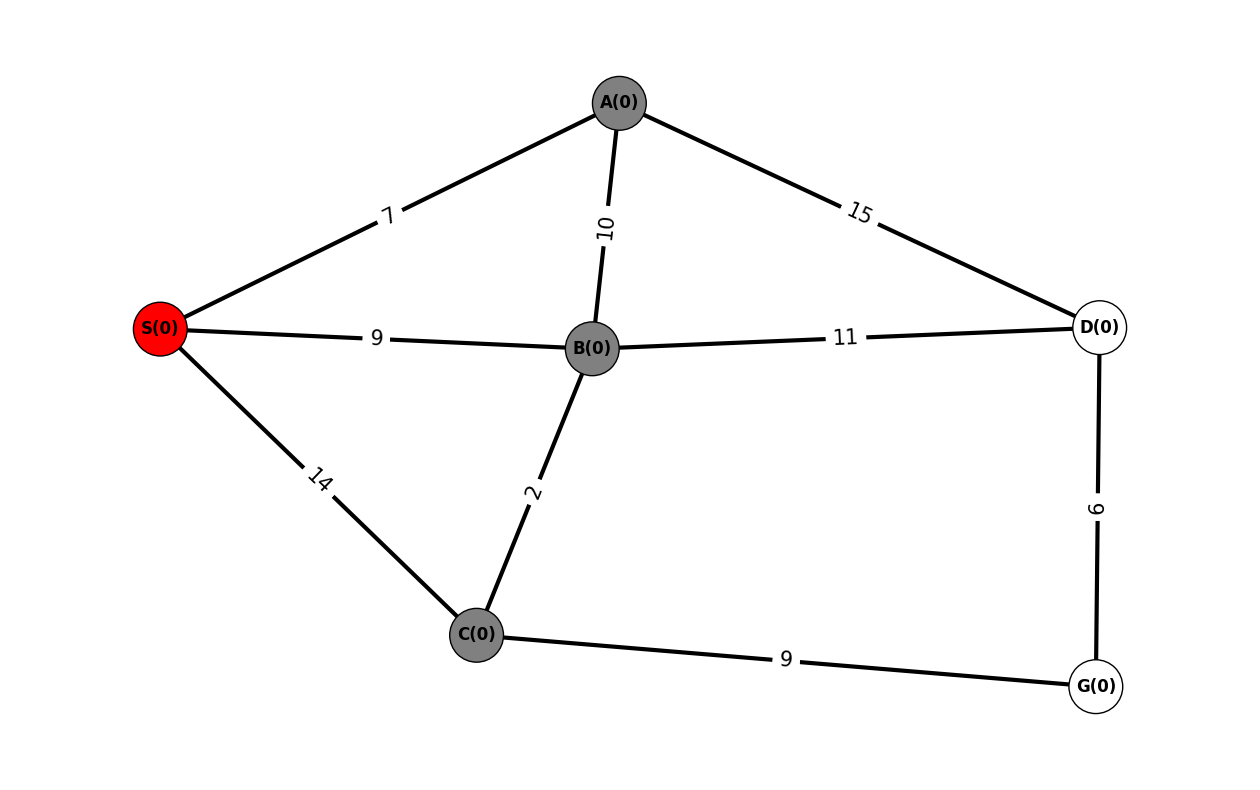

A ['C', 'B', 'D']


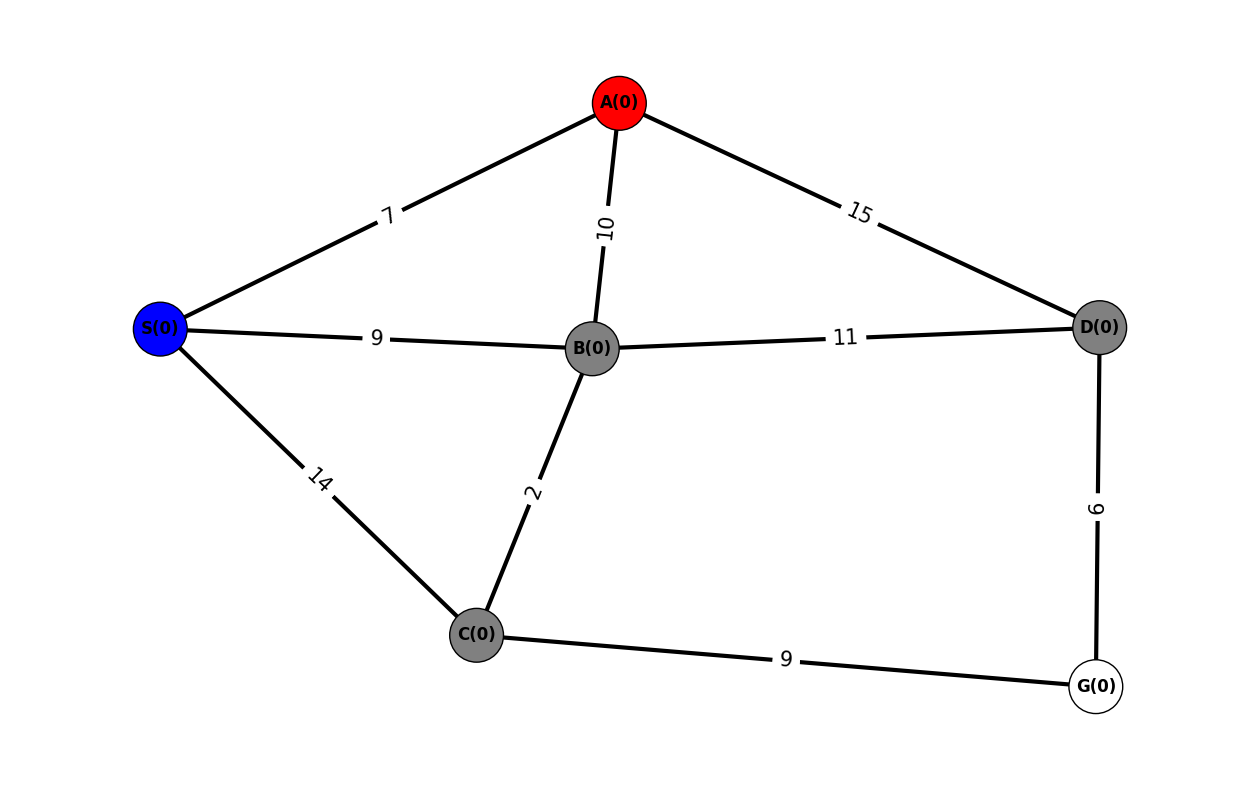

D ['C', 'B', 'G']


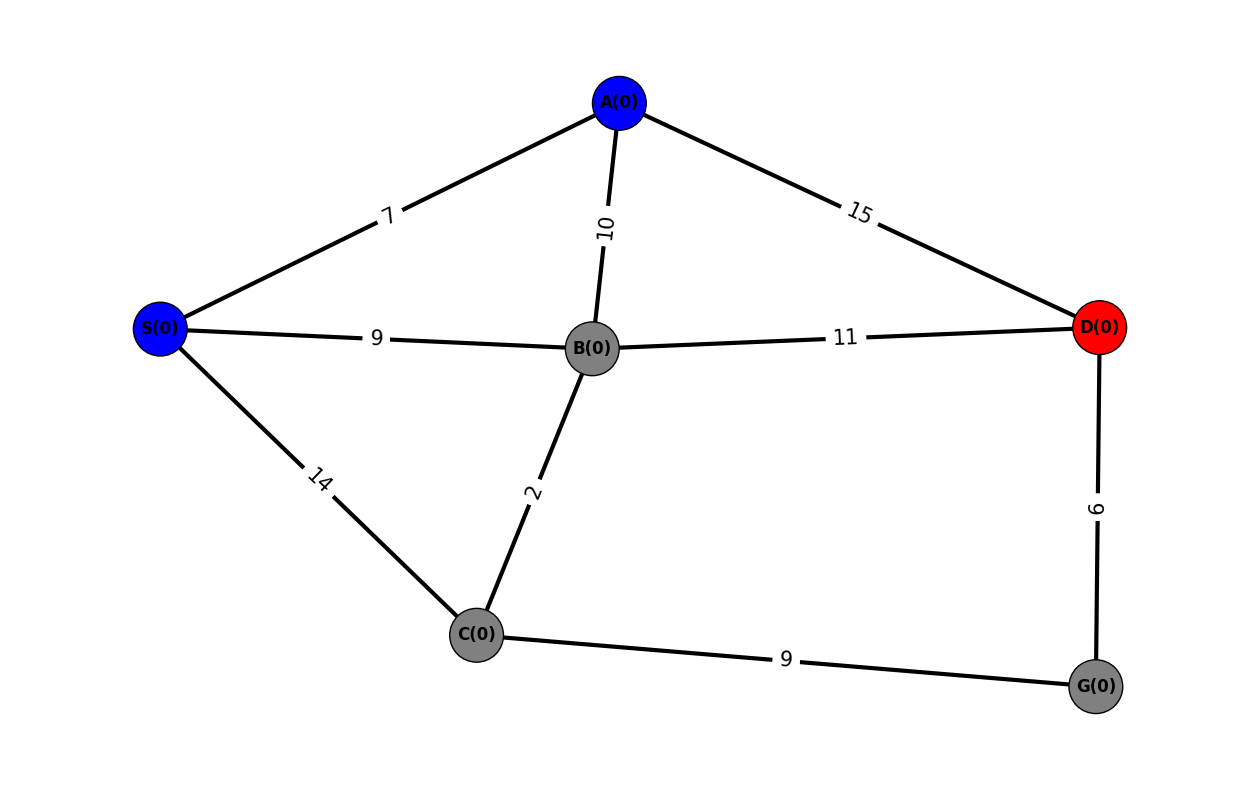

G


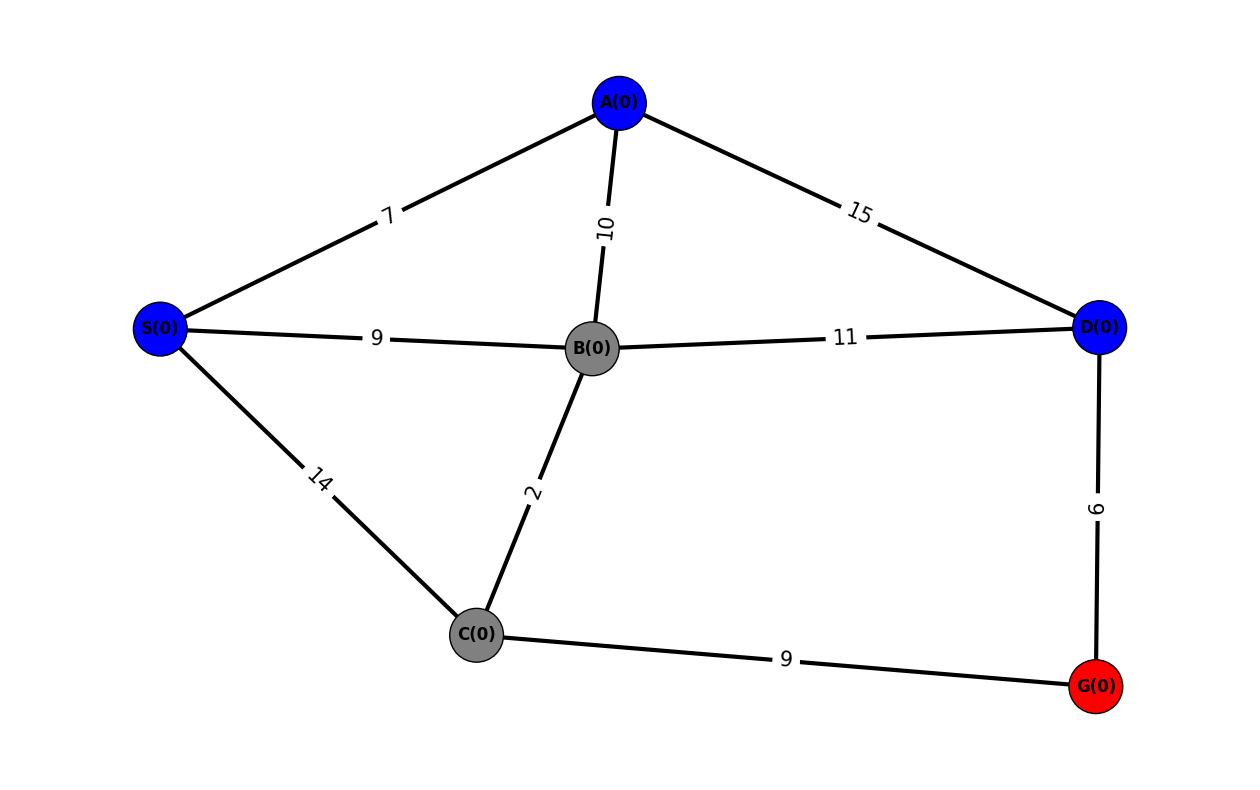

In [12]:
resetColor(g)
dfs(g, "S", "G")

# Depth-First Search (DFS)

- **_Complete?_**
    - **_No_** : fails in infinite-depth spaces, spaces with loops
    Modify to avoid repeated states along path
    ⇒ _complete in finite spaces_
- **_Optimal?_**
    - **_No_**
- **_Time?_**
    - **_O(b<sup>m</sup>)_** : terrible if **_m_** is much larger than **_d_**
    but if solutions are dense, may be much faster than
    _breadth-first_
- **_Space?_**
- **_O(bm)_** , i.e., _linear space!_

## BFS

In [13]:
def bfs(g, start, end):
    q = [start]

    while len(q) > 0:
        curr = q.pop(0)
        g.nodes[curr].color = 'blue'
        
        if curr == end:
            break

        for node, _ in g.edges[curr]:
            if g.nodes[node].color == 'white':
                g.nodes[node].color = 'gray'
                q.append(node)

        print(curr, g.nodes, q)
        display_graph(g, curr)
    
    print(curr, g.nodes, q)
    display_graph(g, curr)

S {'A': Node(value='A', heuristic=0, color='gray'), 'B': Node(value='B', heuristic=0, color='gray'), 'C': Node(value='C', heuristic=0, color='gray'), 'D': Node(value='D', heuristic=0, color='white'), 'S': Node(value='S', heuristic=0, color='blue'), 'G': Node(value='G', heuristic=0, color='white')} ['C', 'B', 'A']


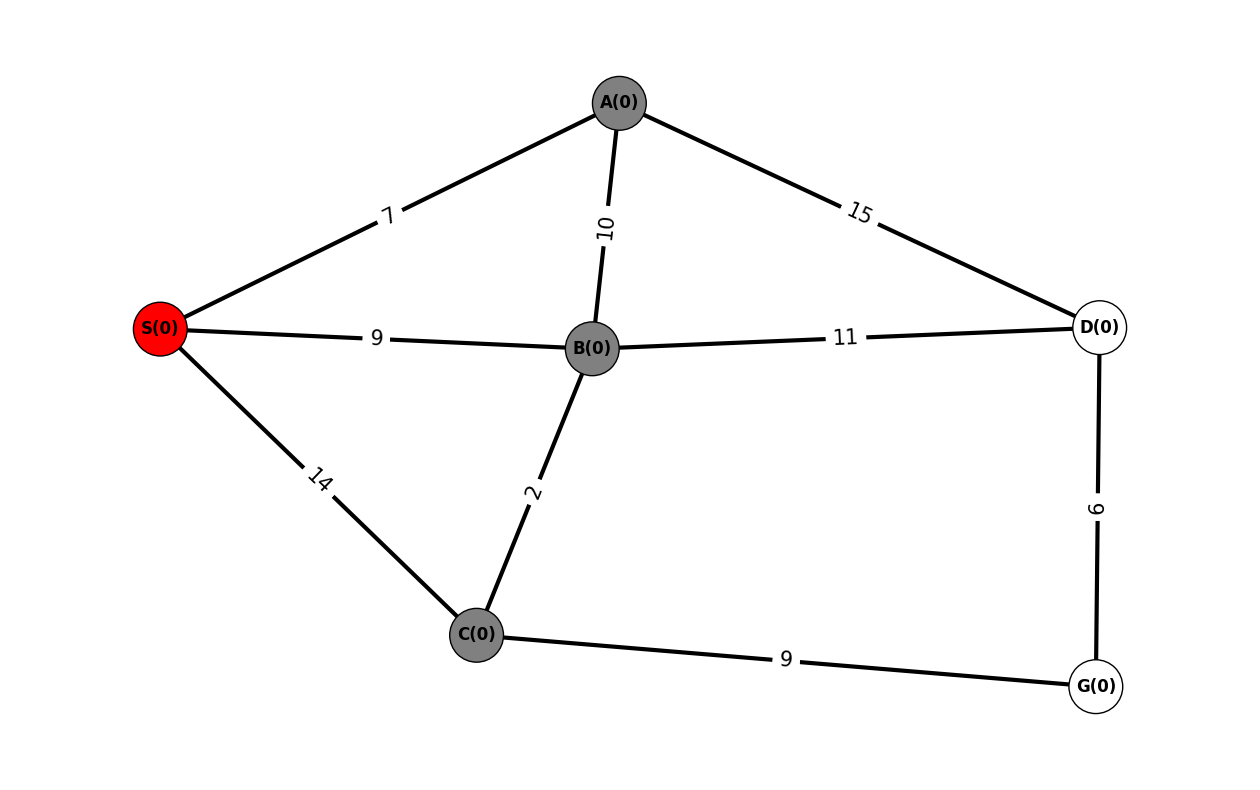

C {'A': Node(value='A', heuristic=0, color='gray'), 'B': Node(value='B', heuristic=0, color='gray'), 'C': Node(value='C', heuristic=0, color='blue'), 'D': Node(value='D', heuristic=0, color='white'), 'S': Node(value='S', heuristic=0, color='blue'), 'G': Node(value='G', heuristic=0, color='gray')} ['B', 'A', 'G']


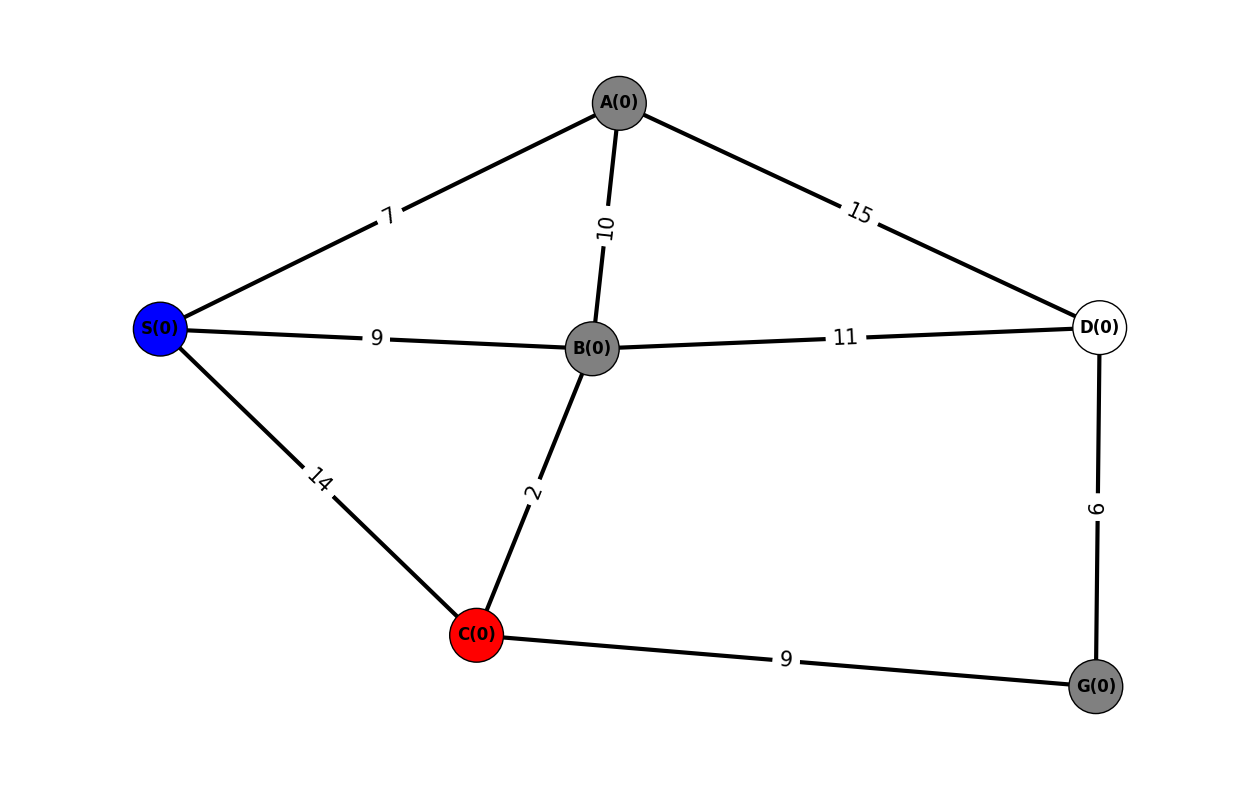

B {'A': Node(value='A', heuristic=0, color='gray'), 'B': Node(value='B', heuristic=0, color='blue'), 'C': Node(value='C', heuristic=0, color='blue'), 'D': Node(value='D', heuristic=0, color='gray'), 'S': Node(value='S', heuristic=0, color='blue'), 'G': Node(value='G', heuristic=0, color='gray')} ['A', 'G', 'D']


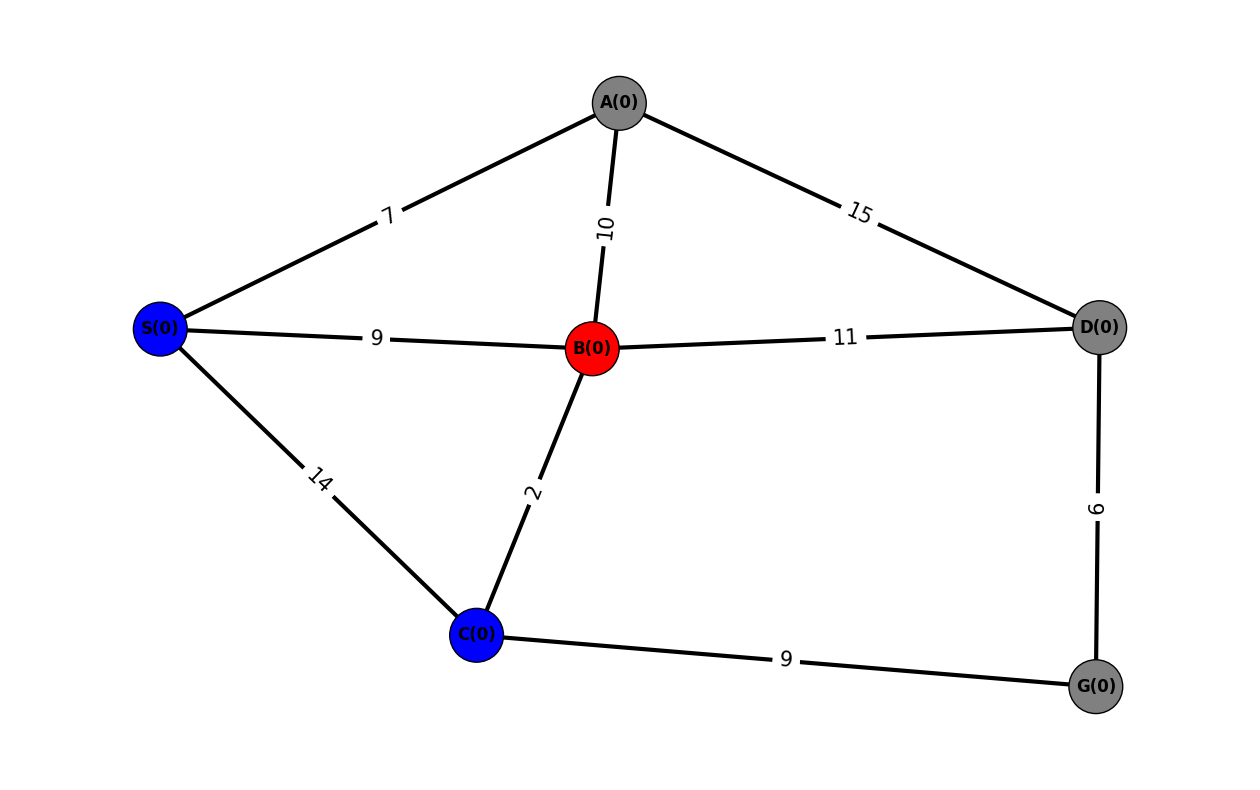

A {'A': Node(value='A', heuristic=0, color='blue'), 'B': Node(value='B', heuristic=0, color='blue'), 'C': Node(value='C', heuristic=0, color='blue'), 'D': Node(value='D', heuristic=0, color='gray'), 'S': Node(value='S', heuristic=0, color='blue'), 'G': Node(value='G', heuristic=0, color='gray')} ['G', 'D']


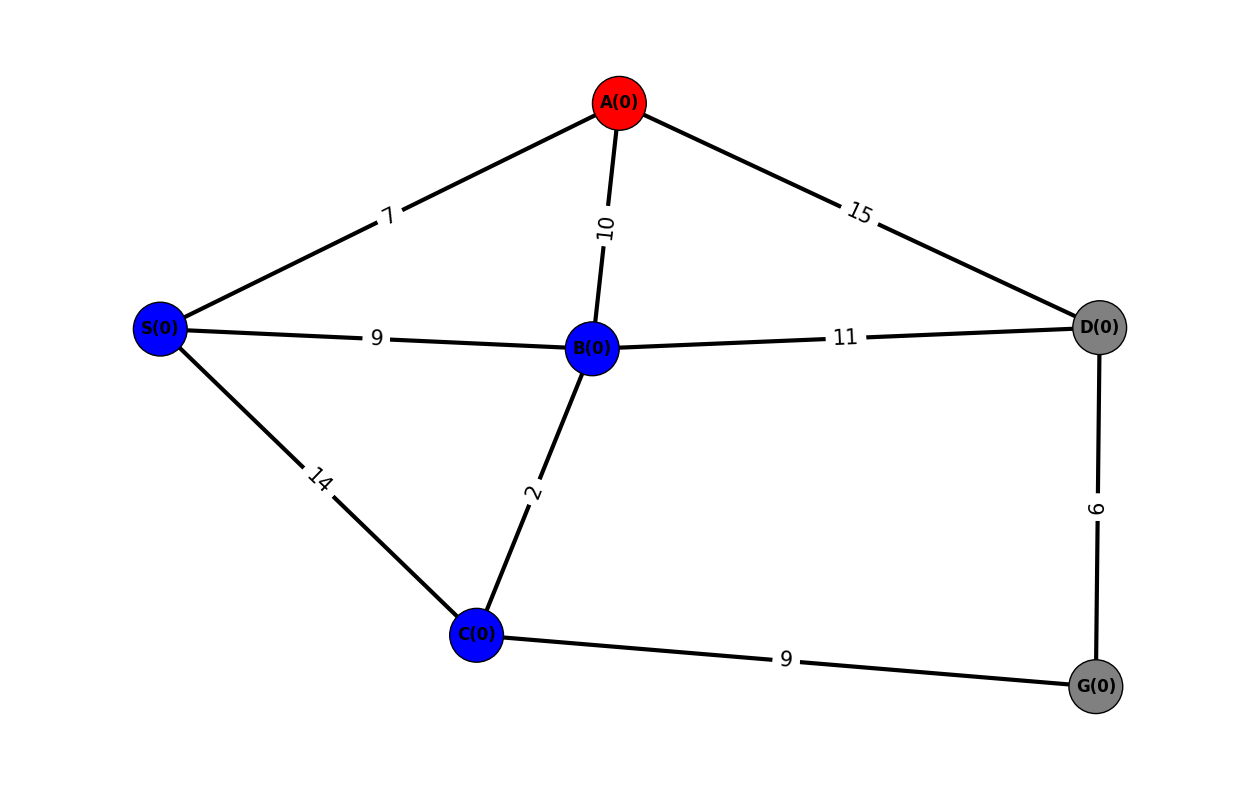

G {'A': Node(value='A', heuristic=0, color='blue'), 'B': Node(value='B', heuristic=0, color='blue'), 'C': Node(value='C', heuristic=0, color='blue'), 'D': Node(value='D', heuristic=0, color='gray'), 'S': Node(value='S', heuristic=0, color='blue'), 'G': Node(value='G', heuristic=0, color='blue')} ['D']


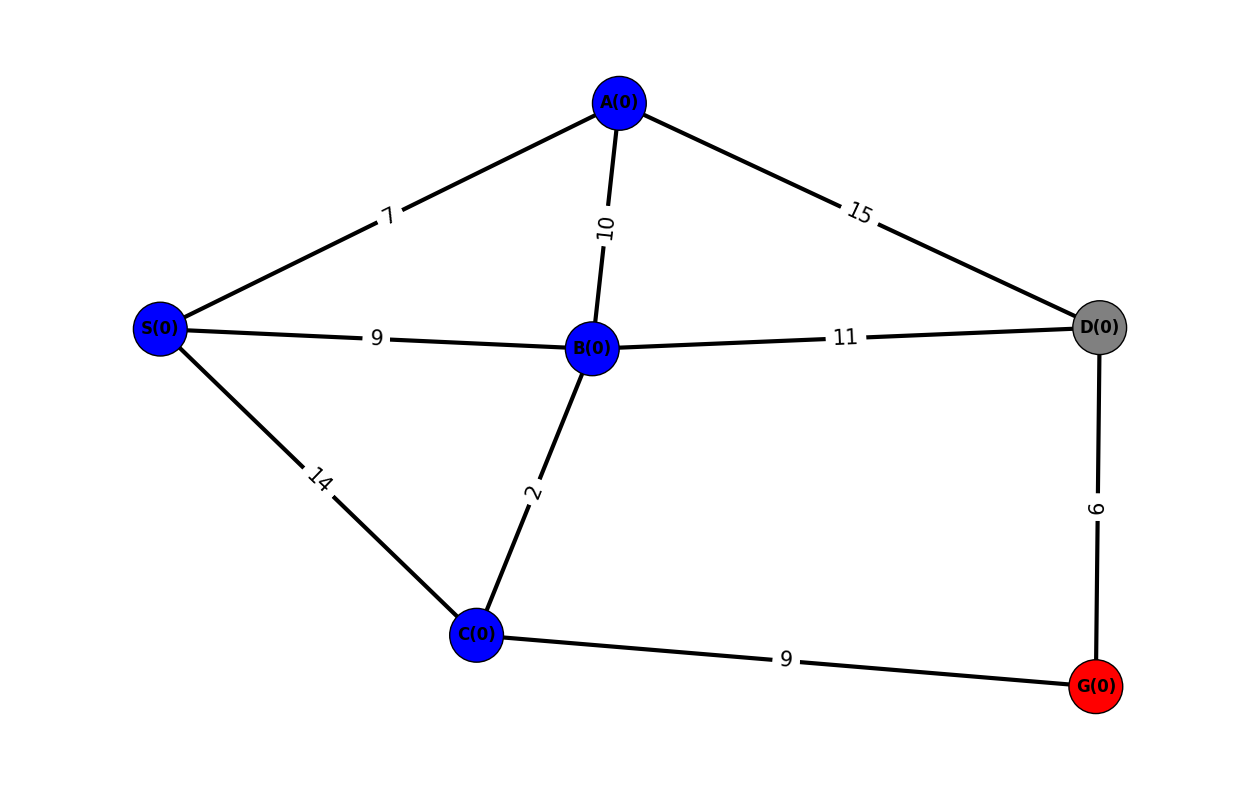

In [14]:
resetColor(g)
bfs(g, "S", "G")

# Breadth-First Search (BFS)

## • Complete?

- **_Yes_** (if **_b_** is finite)

## • Optimal?

- **_Yes_** _(if cost = 1 per step);_ not optimal in general

## • Time?

- **_1 + b + b<sup>2</sup>_+ b<sup>3</sup> +... + b<sup>d</sup> + b<sup>(bd − 1)</sup> = O(b<sup>d + 1</sup>)** _, i.e., exp._ in d

## • Space?

- **_O(b<sup>d+1</sup>)_** (keeps every node in memory)^

# DLS

In [15]:
# we dont need to check for loops
def dls(g, curr, end, max_depth):
    if curr == end:
        print(curr, max_depth)
        display_graph(g, curr)
        return True
    if max_depth <= 0:
        return False
    
    g.nodes[curr].color = 'gray'

    print(curr, max_depth)
    display_graph(g, curr)

    for node, _ in g.edges[curr]:
        if g.nodes[node].color == 'white':
            g.nodes[node].color = 'gray'
            if dls(g, node, end, max_depth - 1):
                return True

    g.nodes[curr].color = 'blue'
    return False


S 2


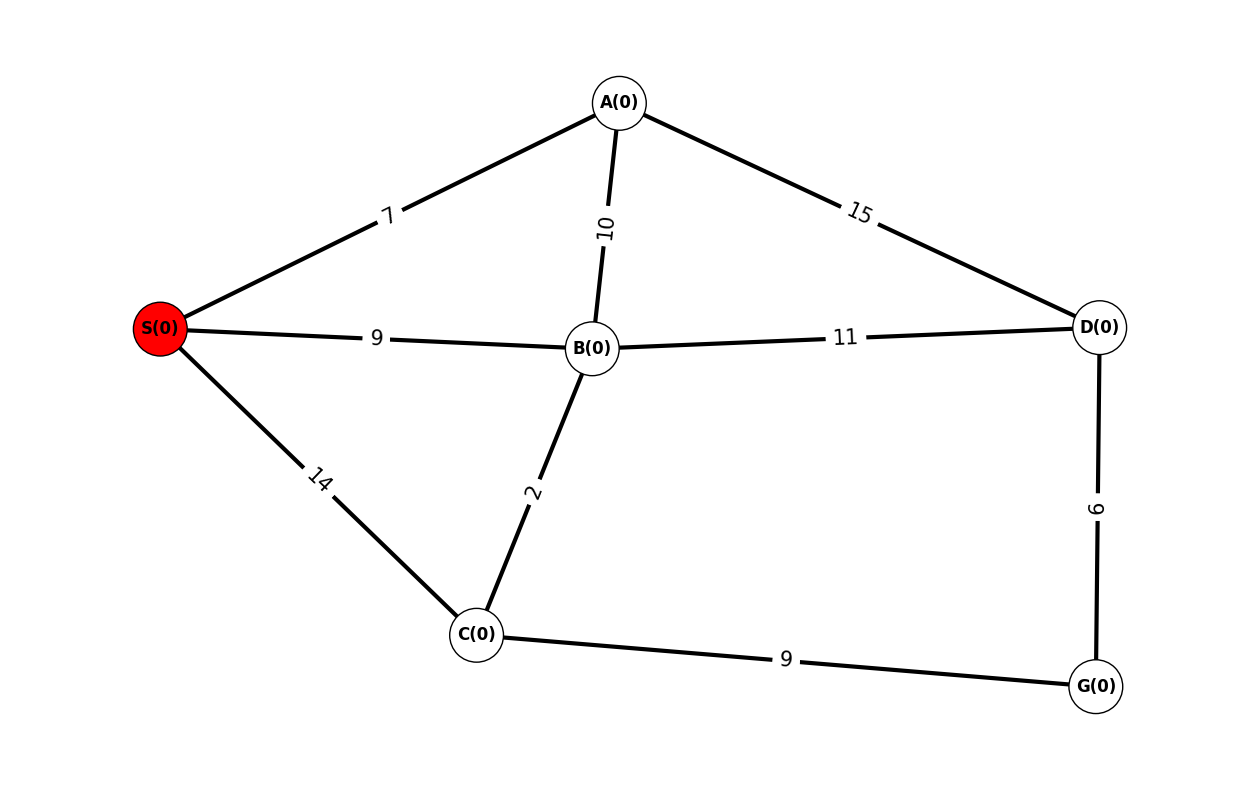

C 1


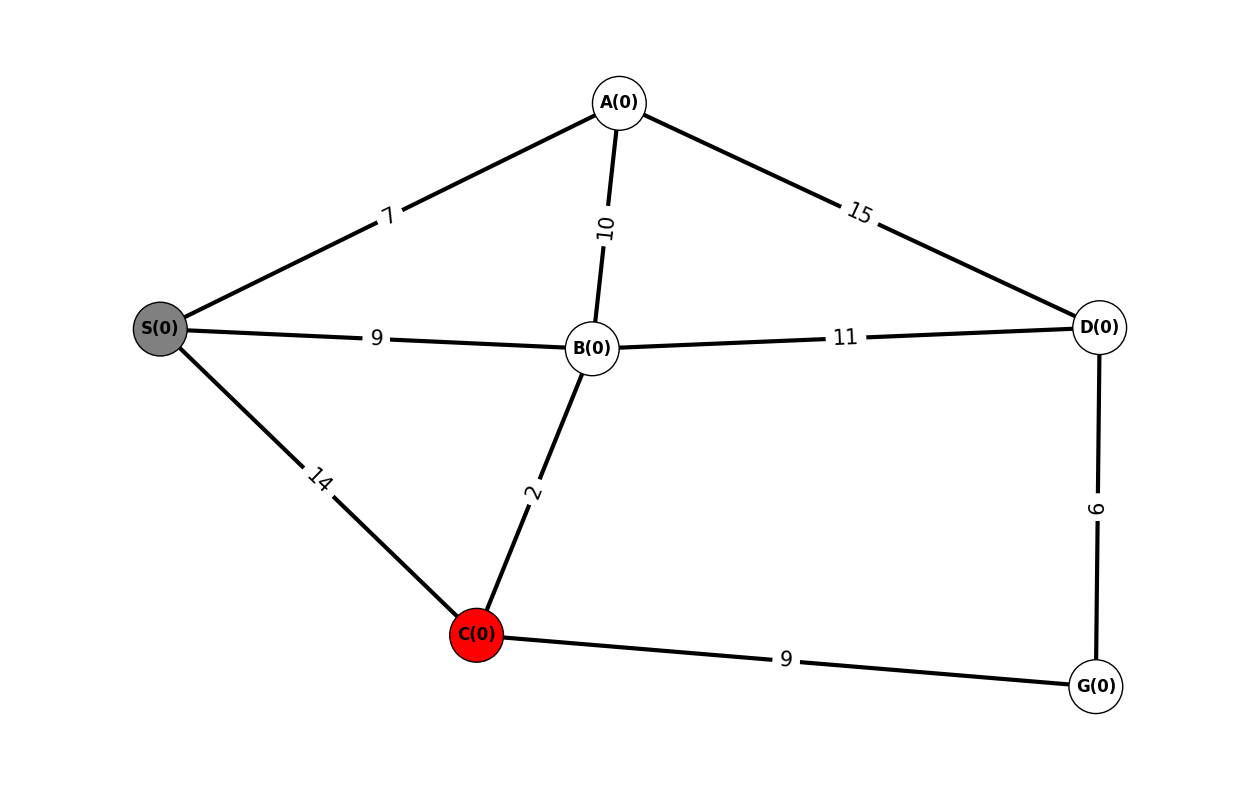

G 0


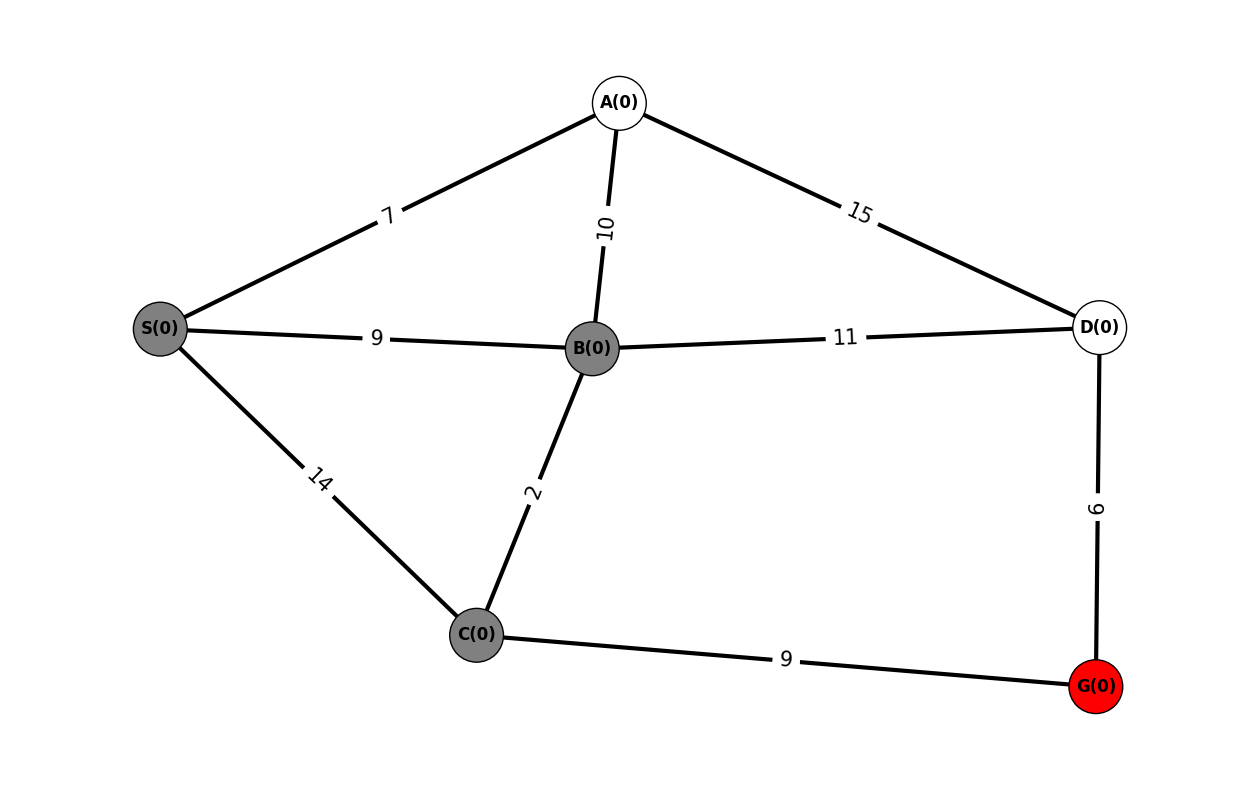

True

In [16]:
resetColor(g)
dls(g, "S", "G", 2)

# Depth-Limited Search (DLS)

_“_ **_DLS_** _= depth-first search with depth limit_ **_l_** _, i.e., nodes at
depth_ **_l_** _have no successors”_

- **_Complete?_**
    - **_Yes_** , if _l ≥ d_
- **_Optimal?_**
    - **_No_**
- **_Time?_**
    - **_O(b<sup>l</sup>)_**
- **_Space?_**
    - **_O(bl)_**

# IDS

In [17]:
def IDS(g, start, end):
    i = 0
    while not dls(g, start, end, i):
        i += 1
        resetColor(g)

    print(i)

S 1


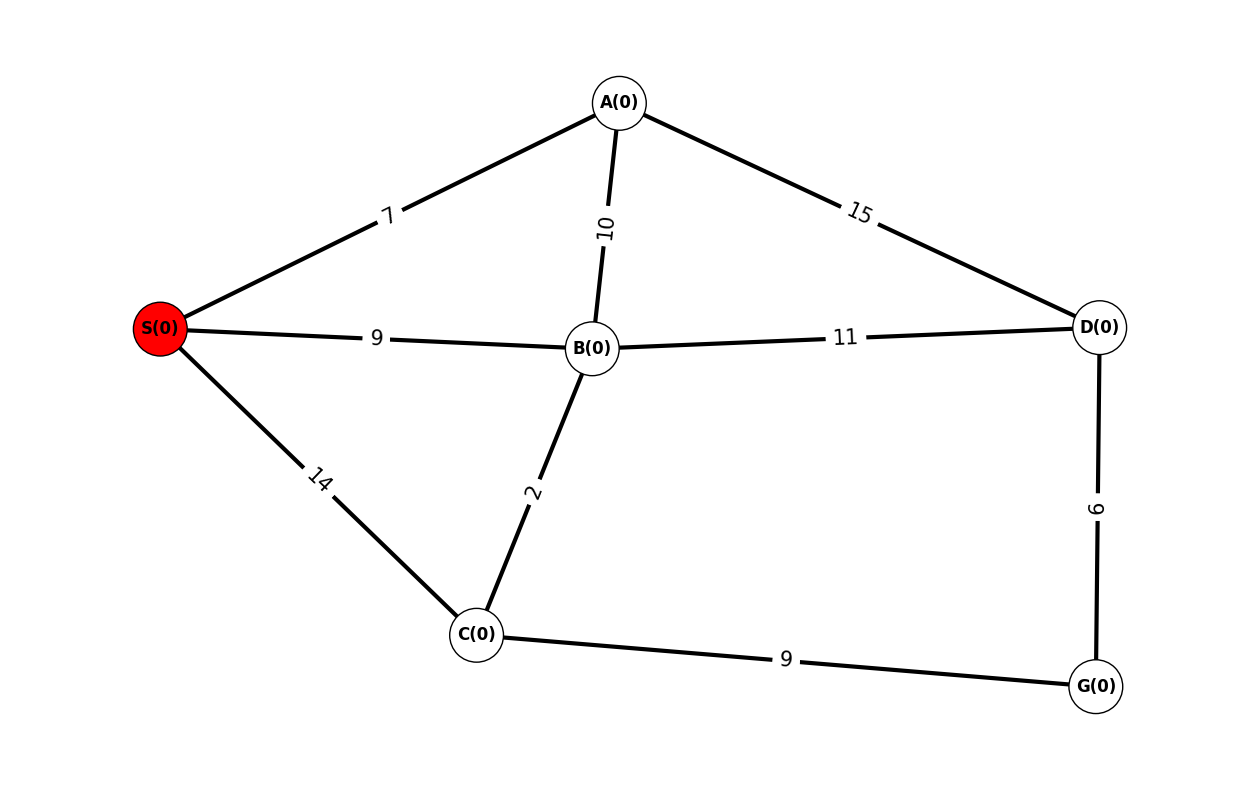

S 2


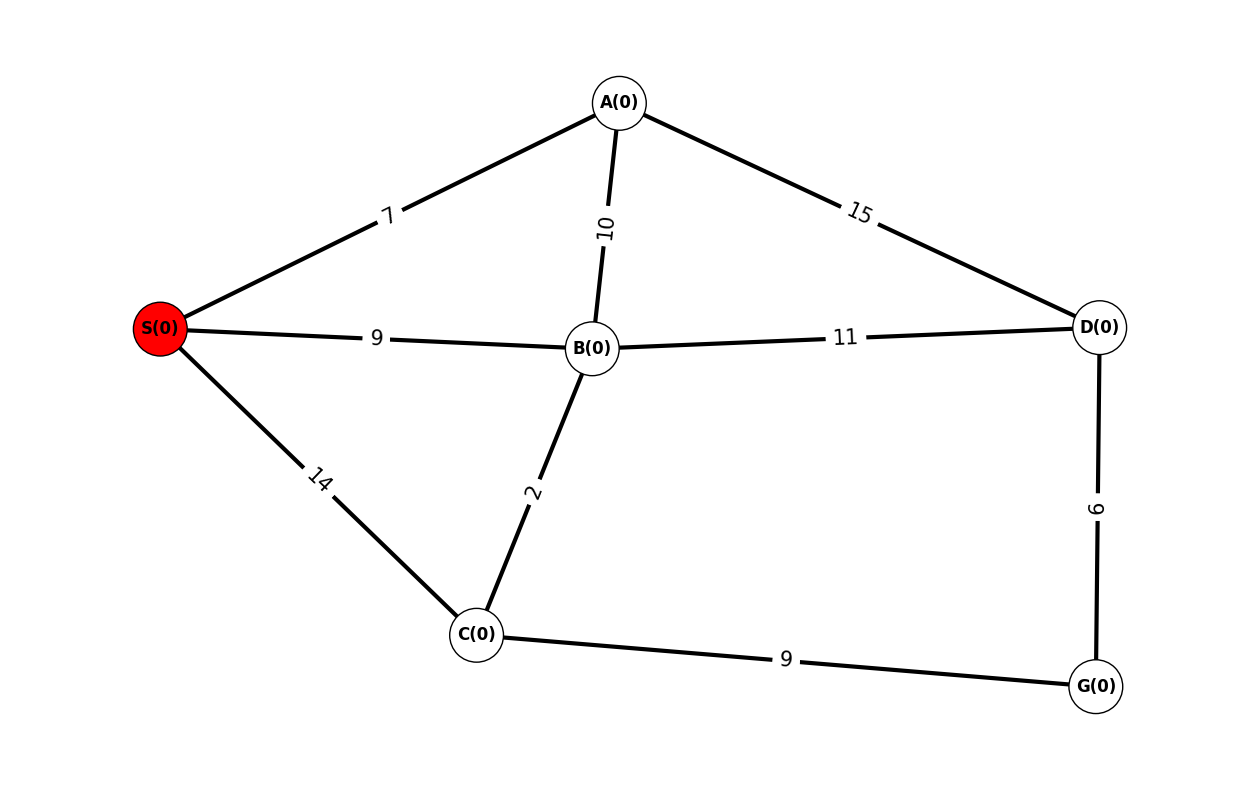

C 1


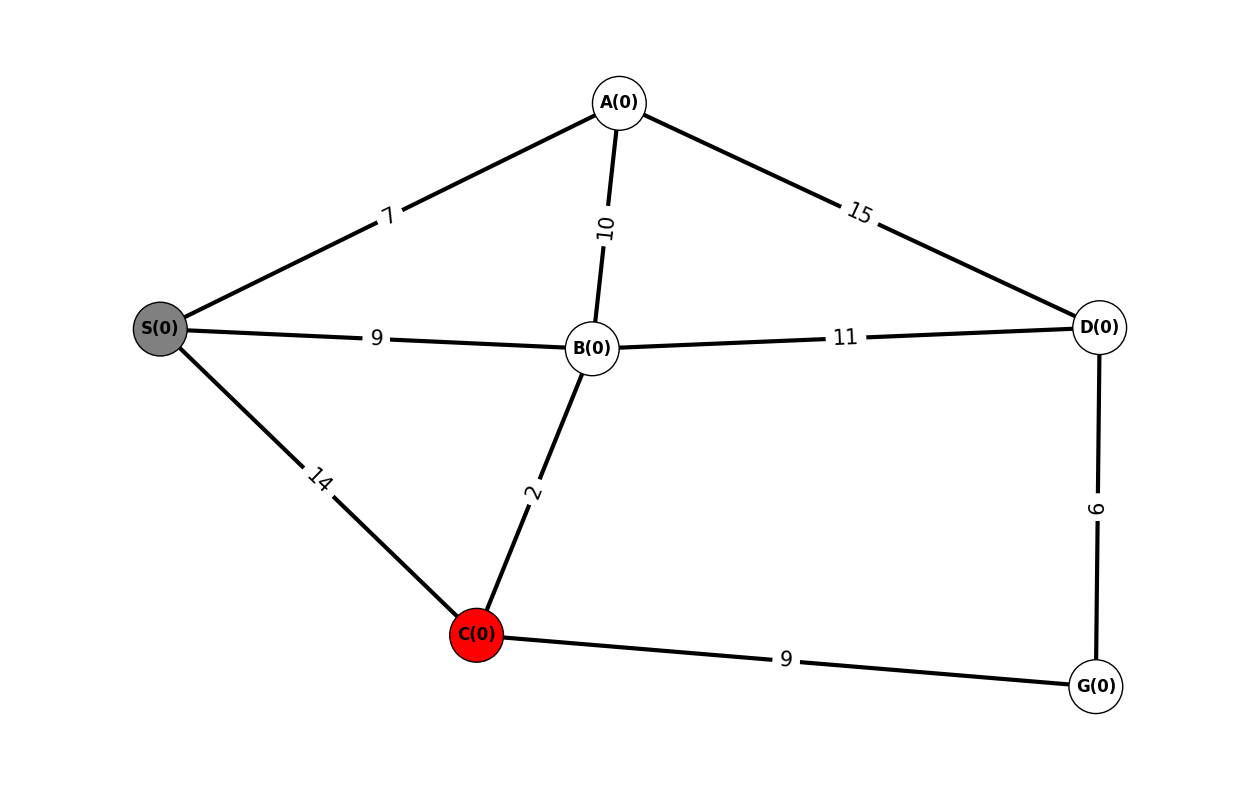

G 0


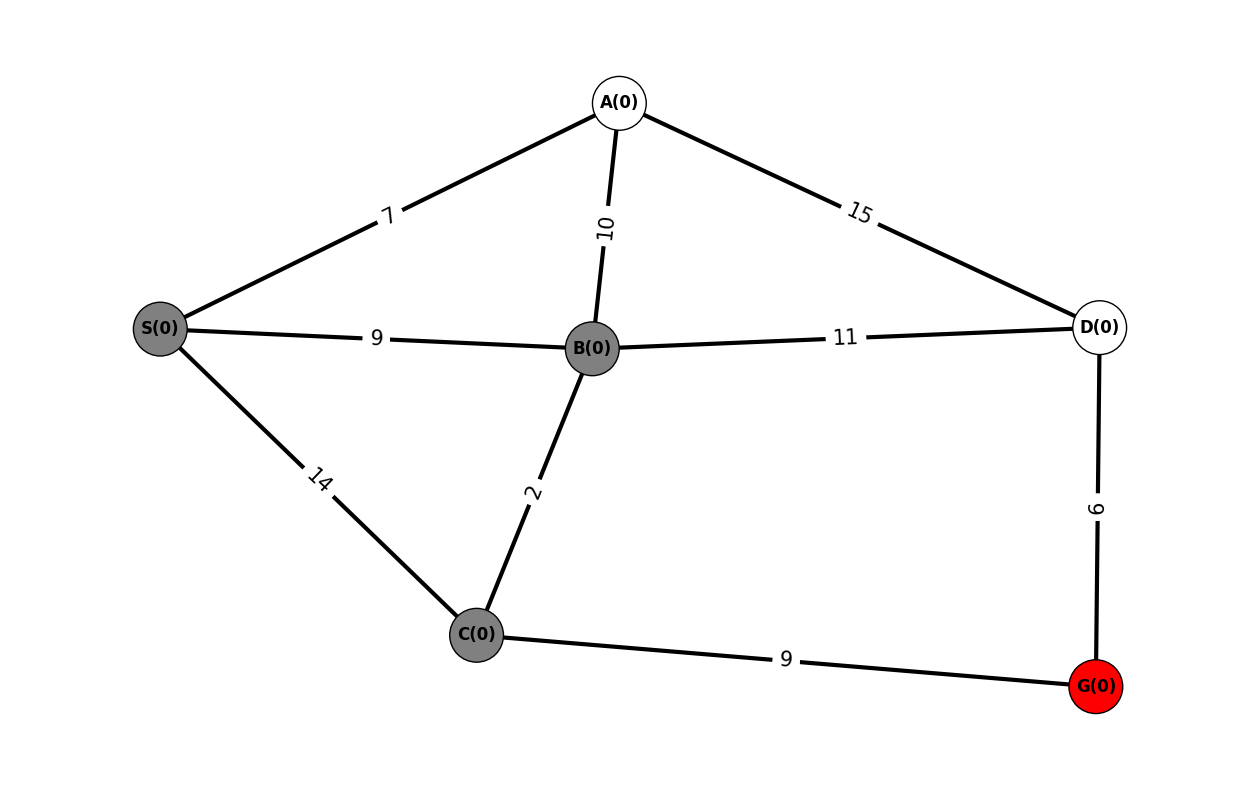

2


In [18]:
resetColor(g)
IDS(g, "S", "G")

# Iterative Deepening Search (IDS)

## • Complete?

- **_Yes_**

## • Optimal?

- **_Yes_** , if _step cost = 1_ (Can be modified to explore uniform-cost tree)

## • Time?

- **_(d + 1)b_**<sup>0</sup> **_+ db_**<sup>1</sup> **_+ (d − 1)b_**<sup>2</sup> **_+... + b<sup>d</sup> = O(b<sup>d</sup>)_**

## • Space?

- **_O(bd)_** , i.e., _linear space!_


# UCS

In [19]:
def relax(dist, x, y, w):
    if dist.get(y) == None or dist[y] > dist[x] + w:
        dist[y] = dist[x] + w

In [20]:
def UCS(g, start, end):
    priority_q = [(0, start)]
    dist = dict()
    dist[start] = 0
    curr = start

    while len(priority_q) > 0:
        _, curr = heapq.heappop(priority_q)

        if curr == end:
            break

        for node, w in g.edges[curr]:
            if g.nodes[node].color == 'white' or g.nodes[node].color == 'gray':
                relax(dist, curr, node, w)
                g.nodes[node].color = 'gray'
                heapq.heappush(priority_q, (dist[node], node))

        print(curr, dist, priority_q)
        display_graph(g, curr)
        g.nodes[curr].color = 'blue'
        
    print(curr, dist, priority_q)
    display_graph(g, curr)

S {'S': 0, 'C': 14, 'B': 9, 'A': 7} [(7, 'A'), (14, 'C'), (9, 'B')]


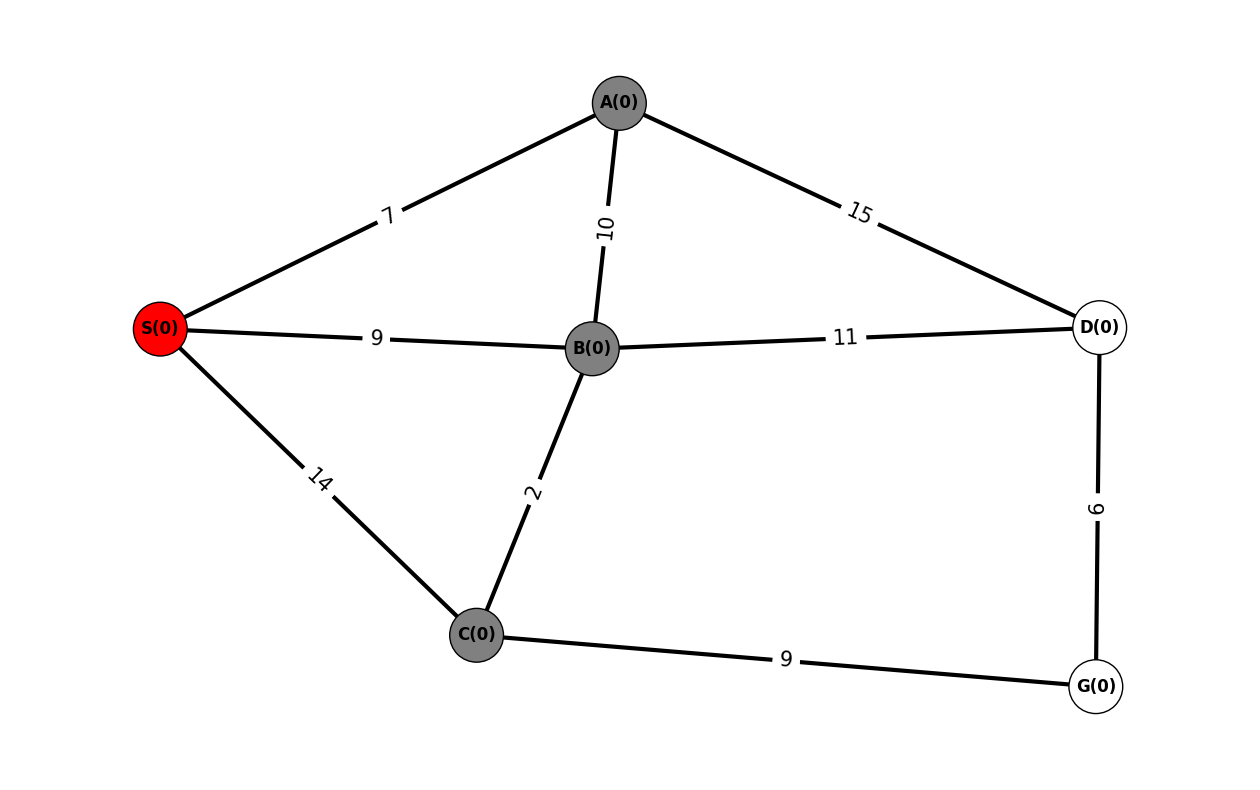

A {'S': 0, 'C': 14, 'B': 9, 'A': 7, 'D': 22} [(9, 'B'), (14, 'C'), (9, 'B'), (22, 'D')]


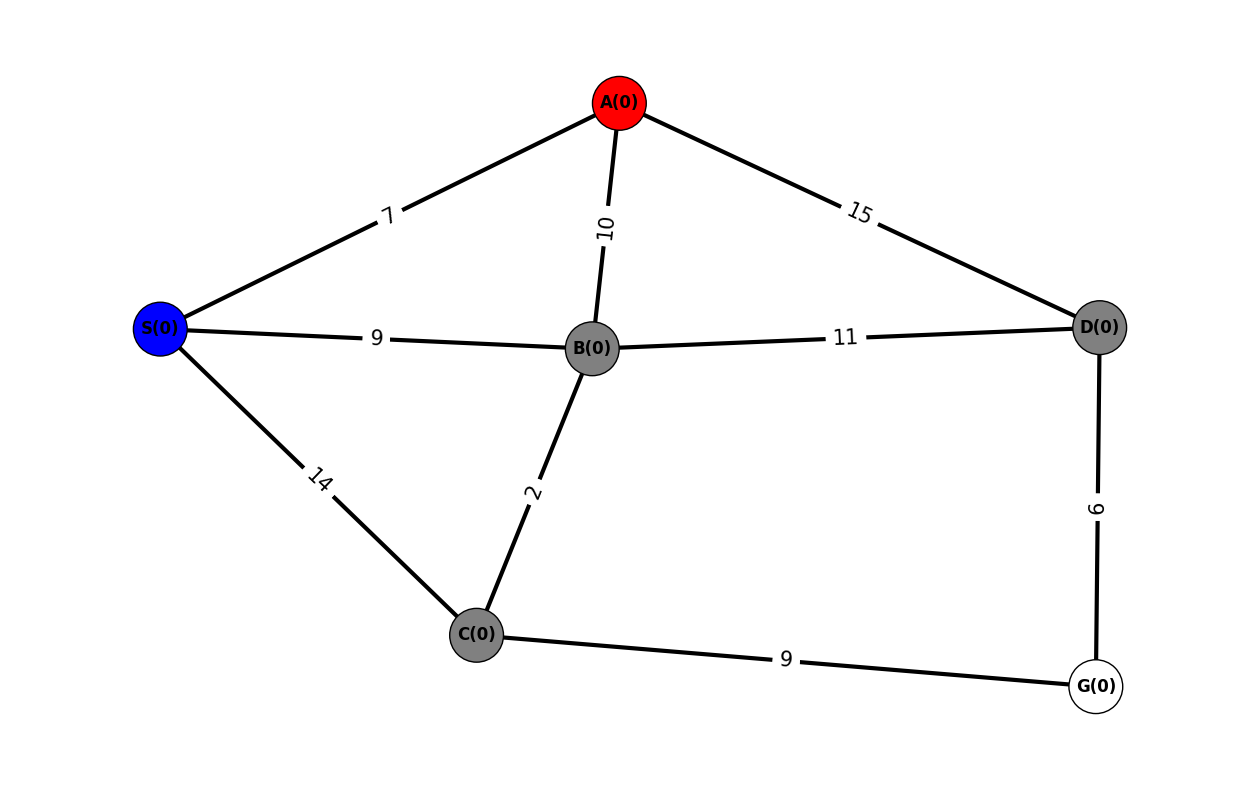

B {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20} [(9, 'B'), (11, 'C'), (22, 'D'), (14, 'C'), (20, 'D')]


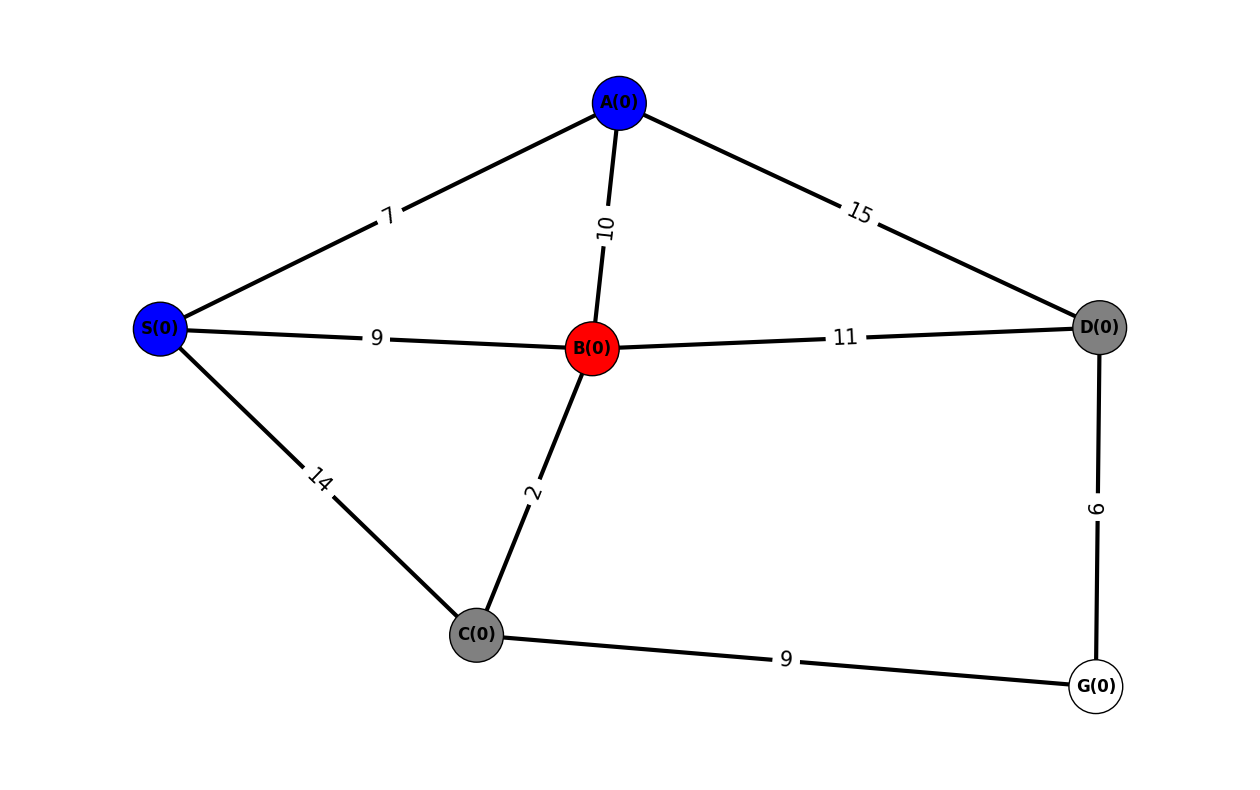

B {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20} [(11, 'C'), (11, 'C'), (20, 'D'), (20, 'D'), (14, 'C'), (22, 'D')]


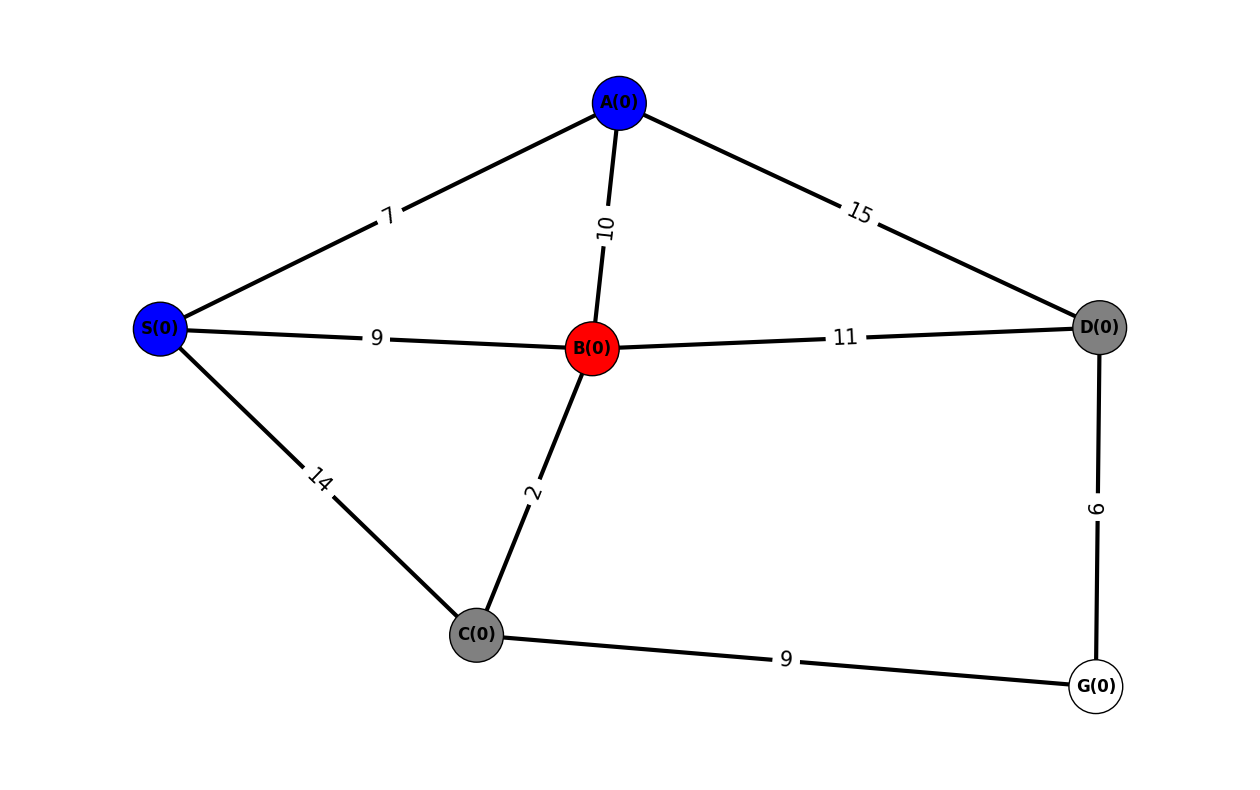

C {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(11, 'C'), (14, 'C'), (20, 'D'), (20, 'D'), (22, 'D'), (20, 'G')]


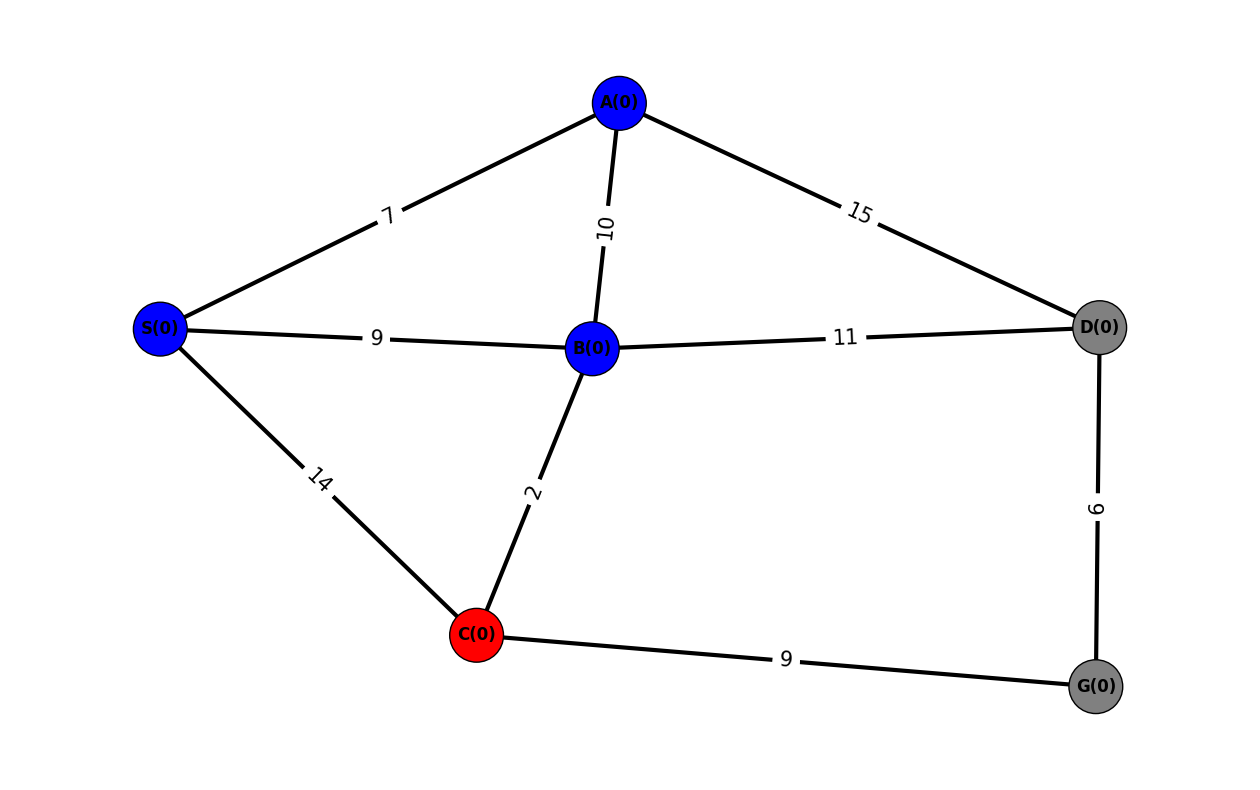

C {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(14, 'C'), (20, 'D'), (20, 'D'), (20, 'G'), (22, 'D'), (20, 'G')]


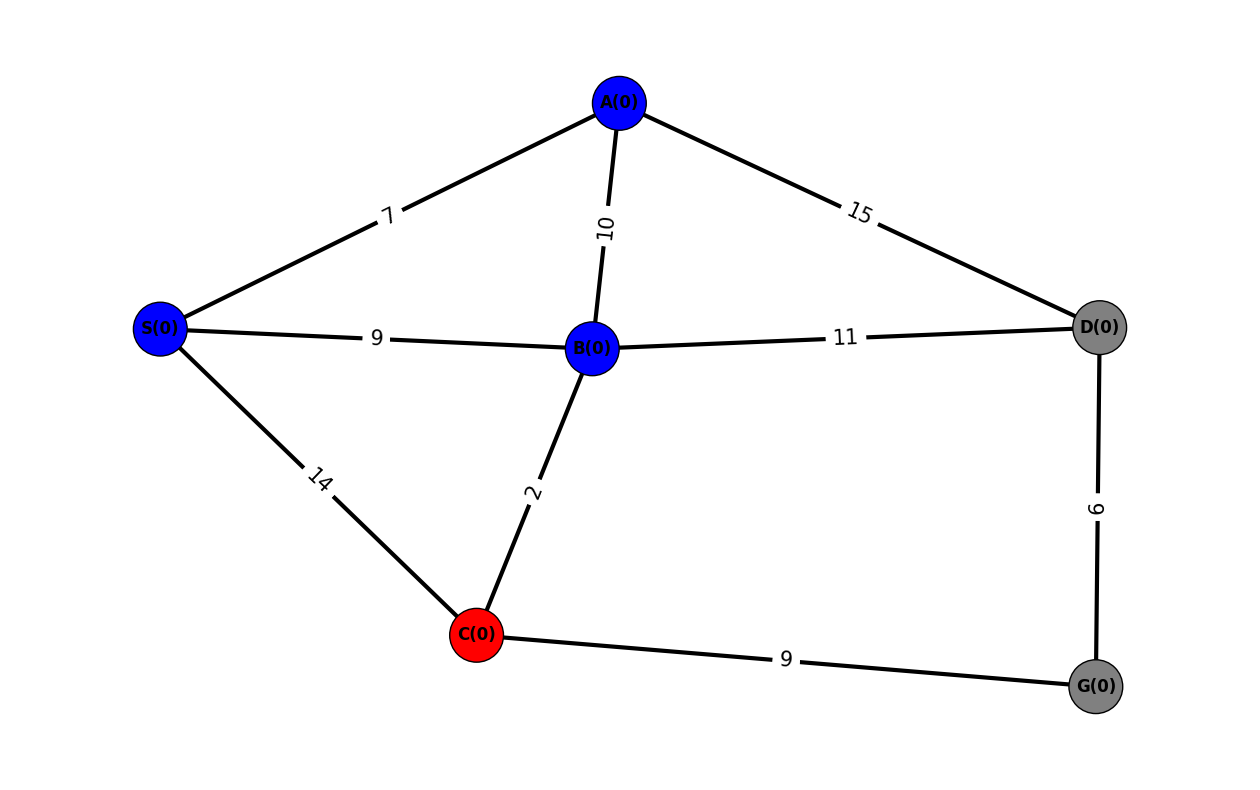

C {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(20, 'D'), (20, 'D'), (20, 'G'), (20, 'G'), (22, 'D'), (20, 'G')]


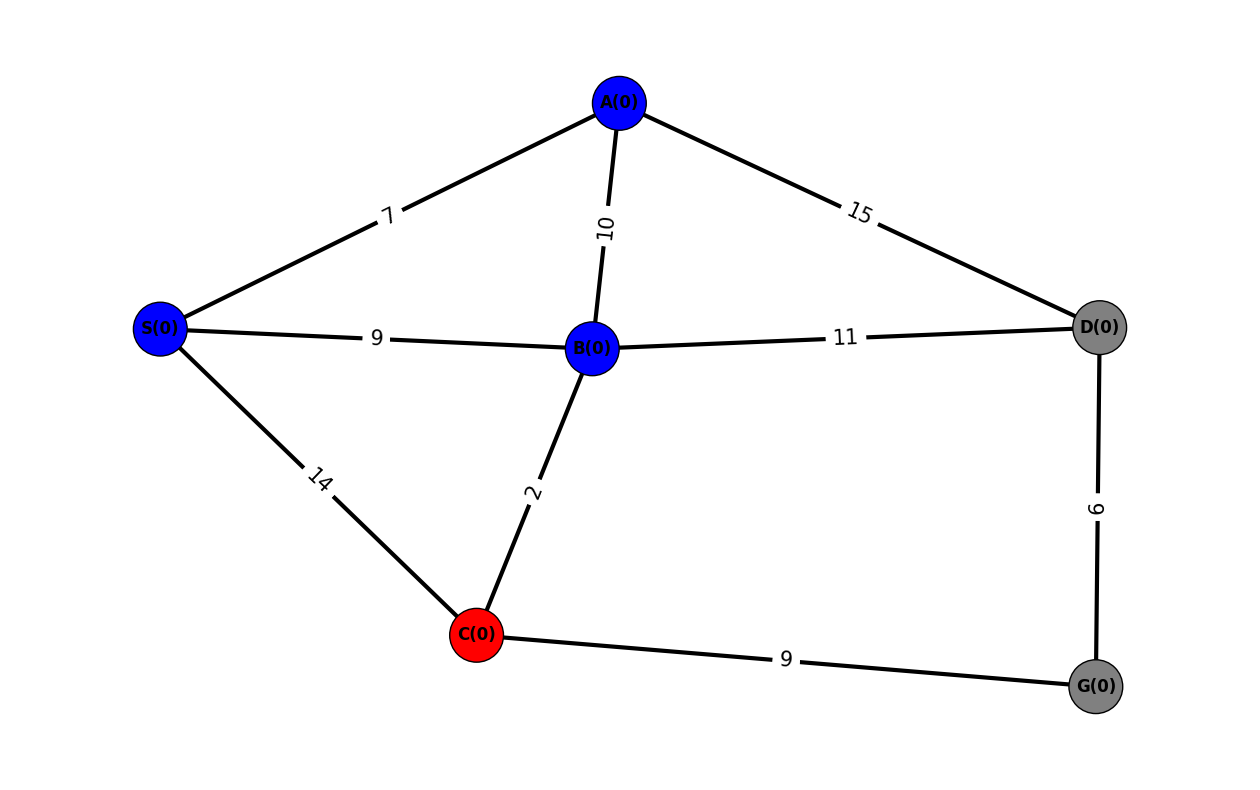

D {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(20, 'D'), (20, 'G'), (20, 'G'), (20, 'G'), (22, 'D'), (20, 'G')]


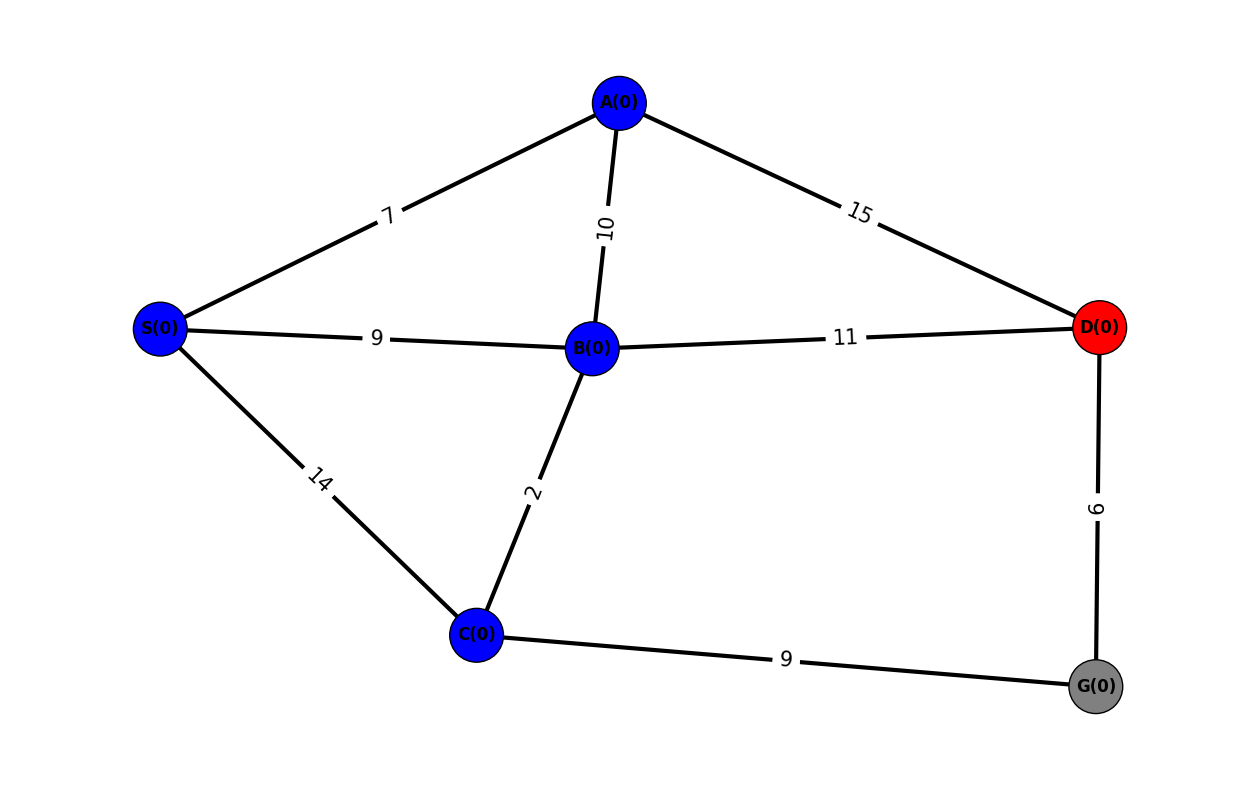

D {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(20, 'G'), (20, 'G'), (20, 'G'), (20, 'G'), (22, 'D'), (20, 'G')]


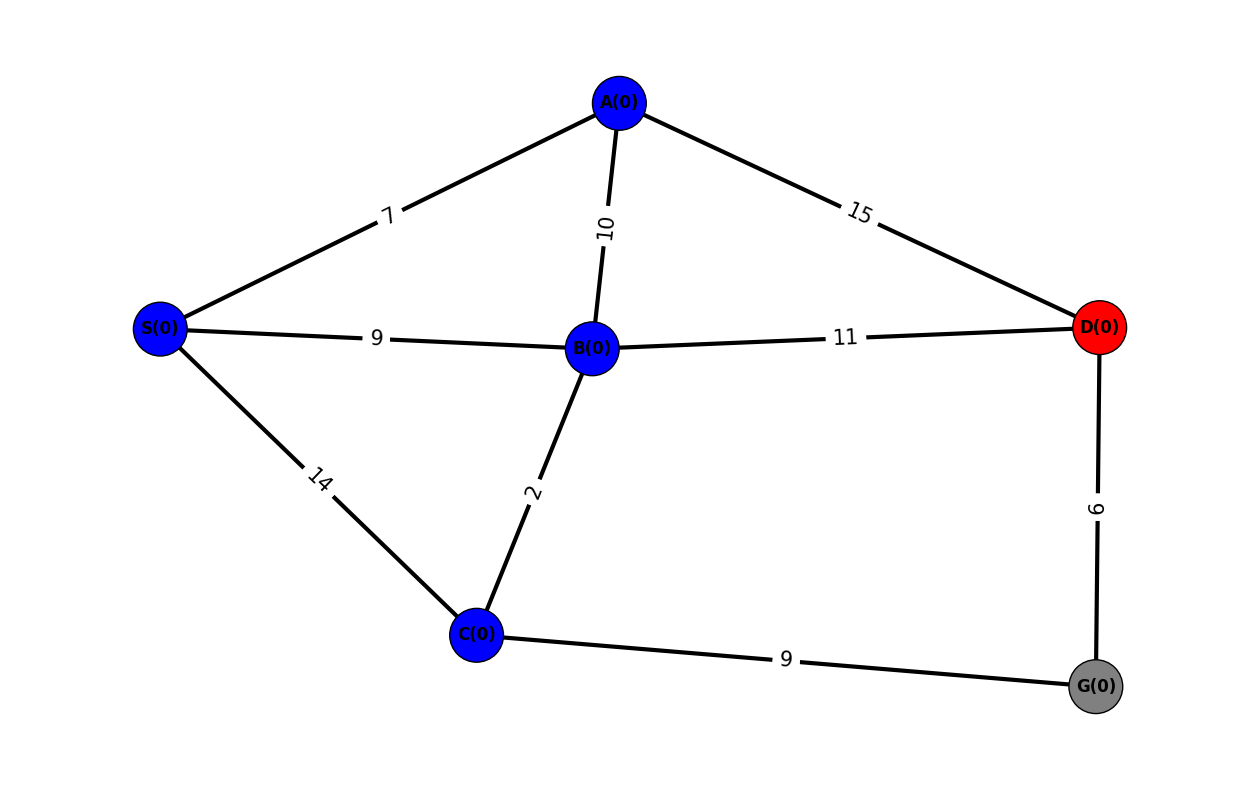

G {'S': 0, 'C': 11, 'B': 9, 'A': 7, 'D': 20, 'G': 20} [(20, 'G'), (20, 'G'), (20, 'G'), (20, 'G'), (22, 'D')]


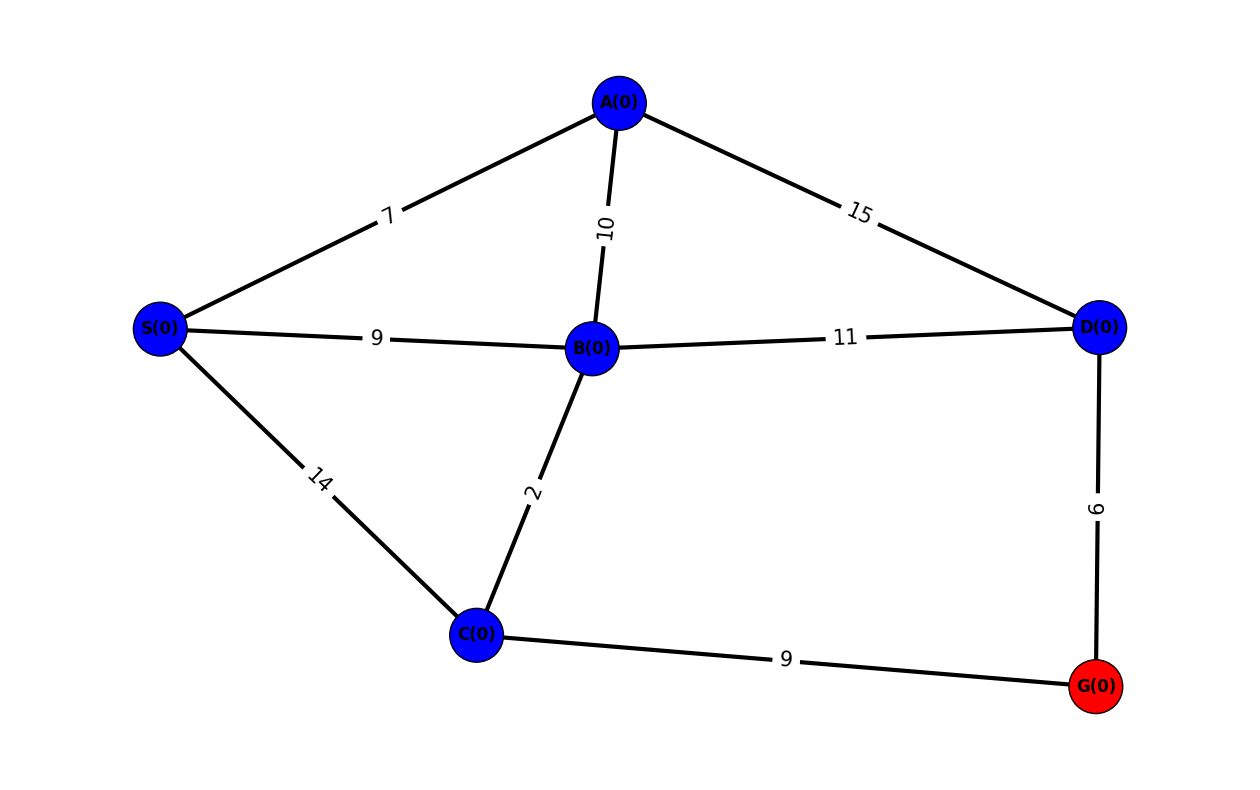

In [21]:
resetColor(g)
UCS(g, 'S', 'G')

# Uniform-Cost Search (UCS)

- **_Complete?_**
    - **_Yes_** , if _step cost ≥ ε_
- **_Optimal?_**
    - **_Yes_** - nodes expanded in increasing order of **_g(n)_**
- **_Time?_**
    - \# of nodes with **_g ≤_** _cost of optimal solution_ , **_O(b_** ⌈ **C*/ε** ⌉ **_)_**
       where **_*** is the _cost of the optimal solution_
- **_Space?_**
    - \# of nodes with **_g ≤_** _cost of optimal solution_ , **_O(b_** ⌈ **C*/ε** ⌉ **_)_**

* Expand least-cost unexpanded node using queue ordered by path cost, lowest first
* Equivalent to breadth-first if step costs all equal
